<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitzV2/blob/MarkovMarkowitz-patch-1/ON1_Trading_Strategy_Functions_v20_DOW30_P056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# @title Markov Markowitz Company / Asset List Generator
# @markdown ---
# @markdown Input parameters for asset selection

LOOKBACK_YEARS = 1 # @param {type:"number"}
LOOKBACK_MONTHS = 0 # @param {type:"number"}
LOOKBACK_DAYS = 0 # @param {type:"number"}
WIN_TR_OC = 0.56  # @param {type: "number"}
WIN_TR = 0.56  # @param {type: "number"}
WIN_US = 0.56  # @param {type: "number"}
RETURN_THRESHOLD = 0.00  # @param {type: "number"}
USE_PRESET_START_END = False # @param {type: "boolean"}
CLEAN_OC_ASSETS = False  # @param {type: "boolean"}  #
OVERNIGHT_STRATEGY = False  # @param {type: "boolean"}
ADD_COMMODITIES = False # @param {type:"boolean"}
COMISSION_PERCENT = 0.0006  # @param {type: "number"}
# @markdown ---
# @markdown Generate asset list for:
BIST_30 = True # @param {type:"boolean"}
BIST_100 = False # @param {type:"boolean"}
BIST_BANKA = False # @param {type:"boolean"}
DOW_30 = True # @param {type:"boolean"}
SP_500 = False # @param {type:"boolean"}
SP500_SAMPLE_SIZE = 70  # @param {type: "number"}
CRYPTOS = False # @param {type:"boolean"}
SHOW_GRAPHICS = True  # @param {type: "boolean"}

# @markdown ---

In [2]:
print("Selected = ", LOOKBACK_YEARS, WIN_TR, WIN_US)

Selected =  1 0.56 0.56


In [3]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files

filename = "MARKOVMAR5.png"

# my_file = Path(f"/content/{filename}")
# if my_file.is_file():
#     pass
# else:
#     files.upload_file(filename)

# display(Image.open(filename))


## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com



--------------------------------------------------

# Portfolio Construction with Maximum Win Probability and Maximum Sharpe Ratio Portfolio upon **BIST**100 Assets("**Borsa ISTanbul", Turkey**) using:

## 1. **Markov Chain Probabilistic Model**

A Markov Chain is a probabilistic model used to represent a system that undergoes a sequence of states over time, where the probability of transitioning from one state to another depends only on the current state. It's named after Andrey Markov, a Russian mathematician who pioneered its development. This model is defined by a set of states and transition probabilities between these states. Each state represents a possible condition or situation of the system, and the transitions between states are governed by probabilities.

The key assumption of a Markov Chain is the Markov property, which states that the future state of the system depends only on its current state and is independent of its past states. In other words, the system has no memory of its history beyond its current state. Markov Chains are widely used in various fields, including finance, natural language processing, and biology, for modeling dynamic processes like stock price movements, text generation, and genetic mutations. They are often employed to make predictions, simulate system behavior, and analyze the long-term statistical properties of a system as it evolves through different states.



<a href = "https://doi.org/10.1017/CBO9780511810633">  Norris </a>, J. R. (1998). Markov Chains. Cambridge University Press.

<a href = "https://www.cs.ubc.ca/~murphyk/Bayes/rabiner.pdf"> Rabiner </a>, L. R. (1989). A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.
Proceedings of the IEEE, 77(2), 257-286.



## 2. **Markowitz's Modern Portfolio Theory**

Modern Portfolio Theory (MPT) is a Nobel Prize-winning economic theory.
It explains how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk. <a href = "https://en.wikipedia.org/wiki/Harry_Markowitz">Harry Markowitz</a> pioneered this theory in his paper <a href = "https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1952.tb01525.x">Portfolio Selection</a> , which was published in the Journal of Finance in 1952. He was later awarded a Nobel Prize for his work on modern portfolio theory. Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.


## Table of contents
1. [Volatility](#volat)
2. [Variance and Standard Deviation](#type_vol)
3. [Managing Portfolio Variance and Portfolio Variance Formula](#manpor)
4. [Asset Selection](#asset_sel)
5. [Select Backtesting Testing Dates](#select_dates)
6. [Download the adjusted close prices of stocks](#downloads)
7. [Plotting daily prices of all the stocks](#plot_daily)
8. [Finding Daily returns](#daily_rets)
9. [Standard deviations volatility and covariance matrix](#stddevs)
10. [Correlation and heatmaps of correlation and effects on volatility](#heatmaps)
11. [Markovitz Model Explanation](#markovitz)
12. [Model portfolio with minimum risk amd its performance evaluation](#model)

## Volatility <a name="volat"></a>

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

## Variance and Standard Deviation <a name="type_vol"></a>

Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren’t getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you’re risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

Take the difference between each data point and the mean Square each difference so that they're all positive values Sum up the squared results Divide this by the count of data points minus one $\sigma^2 = \frac{\sum(x_i - \overline{x}^2)}{n-1}$

where

$\sigma^2 = \textrm{Sample Variance}$

$x_i = \textrm{value of one observation}$

$\overline{x} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance:

$\sigma = \sqrt{\sigma^2}$

where

$\sigma = \textrm{standard deviation}$

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: Both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

## Managing Portfolio Variance and Portfolio Variance Formula <a name="manpor"></a>

In order to try to minimize portfolio variance, a good starting point is the formula itself to calculate variance with a two-asset portfolio.

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y Cov_{x,y}$

where

* $w_x$ = portfolio weight of asset x
* $w_y$ = portfolio weight of asset y
* $\sigma_x$ = standard deviation of asset x
* $\sigma_y$ = standard deviation of asset y
* $Cov_{x,y}$ = Covariance of the two assets

Also, building off the previous lesson this means that
$\textrm{Portfolio Standard Deviation} = \sqrt{\textrm{Portfolio Variance}}$



With this information in mind, there are 3 things we can do to minimize variance.

1. We can pick assets with lower standard deviations of returns. This may seem obvious, but if we really want to reduce the variance of our portfolio, the simplest thing to do is just pick assets that have relatively low volatilities.
2. Invest a higher percentage of your portfolio into your less risky asset(s). For our previous example with JPM and Bitcoin, we could further reduce our portfolio variance by investing a bigger portion of our funds into JPM since it had a lower standard deviation than Bitcoin.

Sometimes, it's the case that an investor may still want to invest in a riskier asset like Bitcoin. This brings us to the third thing we can do to reduce variance.

3. Check for assets with a low covariance. If you look at the right side of our portfolio variance function, you'll notice we have the covariance of two assets as a function parameter. If we can reduce that, we can reduce the overall variance of our portfolio.

This is an important point and should be expanded upon further.


## Covariance-Correlation Relationship
If you recall from a previous lesson, the formula for correlation is:

$\rho_{x,y} = \frac{Cov_{x,y}}{\sigma_x*\sigma_y}$

We can rearrange this to get the covariance formula:

$Cov_{x,y} = \rho_{x,y}\sigma_x\sigma_y$

Then, we can plug this back into our portfolio variance formula:

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y \rho_{x,y}\sigma_x\sigma_y$


These formulas are basically to show that we need to minimize correlations in order to minimize portfolio variance. Owning uncorrelated assets illustrates the efficient benefits of diversification. Let's write some reusable functions to sum up the work we did above and really display how this works with a few examples.


As seen in the formula, in order to minimize portfolio variance we need to minimize the covariance term. And this can be done by minimization coefficents of this covariance term

In [4]:
!pip3 install pyfolio
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=60ceac4ca6fa15ffa86cfdb305d262bfe79f7472f1b204f0ab47658f0c60391b
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=9462bb1ec0cd5eb4c5893c1fed9e96ba0ee42873f5efc51e3ef67cdf9da1d24e
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

In [5]:
import os
import pandas_datareader.data as web
from datetime import datetime
from pprint import pprint
import pandas as pd

import datetime
import pyfolio as pyf
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


current_date = datetime.datetime.now()

delta = LOOKBACK_YEARS
d2 = LOOKBACK_MONTHS
d3 = LOOKBACK_DAYS
day = current_date.day - d3
month = current_date.month - d2
year = current_date.year - delta

START = f'{year}-{month}-{day}'
END = f'{year+delta}-{month+d2}-{day+d3}'

LEFT, RIGHT = datetime.date(year, month, day), datetime.date(year+delta, month+d2, day+d3)
START, END


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


('2023-2-27', '2024-2-27')

In [6]:
TARGET_RETURN = 0.00
VOLATILITY_FACTOR = 0.45

WINNER_LIMIT_TR_OC = WIN_TR_OC
WINNER_LIMIT_TR = WIN_TR
WINNER_LIMIT_US = WIN_US
R_WINDOW = 32
REVERSED = True



Ticker = "EREGL"    # EREGL, ASELS, KCHOL THYAO akşam al sabah sata uygun
TickerIS = Ticker + ".IS"

TR_Tickers = ["EREGL", "CANTE", "GARAN", "KCHOL", "EUPWR"]
US_Tickers = ["TSLA", "AAPL", "GOOGL", "BA", "V"]
DOW30 = ["AXP","AMGN","AAPL","BA","CAT","CSCO","CVX","GS","HD","HON","IBM","JNJ","KO","JPM",
         "MCD","MMM","MRK","MSFT","NKE","PG","TRV","UNH","CRM","VZ","V","WBA","WMT","DIS"]

BIST30 = [ "AKBNK","ALARK","ARCLK","ASTOR","ASELS","BIMAS","EKGYO","ENKAI","EREGL","FROTO","GARAN",
          "GUBRF","HEKTS","ISCTR","KOZAA","KOZAL","KRDMD","PETKM","PGSUS","SAHOL","SASA",
          "ODAS","SISE","TAVHL","TCELL","THYAO","TOASO","TUPRS","YKBNK","EUPWR", "XU100"]

          # ODAS 15.9.2022 daki tavanı sebebiyle çıkarıldı
BIST30.remove("SASA")
BIST30.remove("HEKTS")
BIST30.remove("ODAS")
BIST30.remove("ASTOR")
BIST30.remove("EUPWR")

if ADD_COMMODITIES:
  BIST30.append("GC=F")
  BIST30.append("CL=F")

BANKALAR =   [  "AKBNK", "GARAN",
                "ISCTR", "YKBNK",
                "ALBRK", "HALKB",
                "SKBNK", "TSKB",
                "VAKBN" ]

CRYPTOS = [

"BTC-USD",
"ETH-USD",
# "USDT-USD",
# "BNB-USD",
# "USDC-USD",
"XRP-USD",
# "SOL-USD",
# "LUNA1-USD",
"ADA-USD",
# "HEX-USD",
# "AVAX-USD",
# "DOGE-USD",
# "BUSD-USD",
# "SHIB-USD",
# "WBTC-USD",
# "MATIC-USD",
# "STETH-USD",
# "NEAR-USD",
# "CRO-USD",
# "DAI-USD",
# "LTC-USD",
# "TRX-USD",
# "ATOM-USD",
# "LINK-USD",
# "UNI1-USD",
# "BCH-USD",
# "LEO-USD"

          ]

USD_EUR = ["TRY=X", "EURTRY=X"]
USDTR_GOLD = ["GC=F", "TRY=X", "EURTRY=X"]
Metals = ["GC=F", "TRY=X",  "SI=F"]
Metals_Oil = ["GC=F",  "SI=F", "CL=F"]
Gold_Oil_ETFS = ["AAAU",  "GDX", "OIL"]


BIST100 = ["AKBNK","ALARK","ARCLK","ASELS","BIMAS","EKGYO","ENKAI","EREGL","FROTO","GARAN",
          "GUBRF","HEKTS","ISCTR","KOZAA","KOZAL","KRDMD","ODAS","PETKM","PGSUS","SAHOL","SASA",
          "SISE","TCELL","THYAO","TOASO","TUPRS","YKBNK",
          "AEFES","AGHOL","AHGAZ","AKCNS","AKFGY","AKSA","AKSEN",
           "ALBRK","ASUZU","AYDEM","BAGFS","BERA",
           "BRSAN","BRYAT","BUCIM","CANTE","CCOLA","CEMTS","CIMSA",
           "DOAS","DOHOL","ECILC","ECZYT","EGEEN","ENJSA",
           "GENIL","GESAN","GLYHO","GSDHO","GWIND","HALKB","IPEKE",
           "ISDMR","ISGYO","ISMEN","IZMDC","KARSN","KMPUR",
           "KONTR","KONYA","KORDS","KZBGY","MAVI","OTKAR","OYAKC",
           "PENTA","QUAGR","SELEC","SKBNK","SMRTG",
           "SNGYO","SOKM","TAVHL","TKFEN","TKNSA","TSKB",
           "TTKOM","TTRAK","TUKAS","ULKER","VAKBN","VESBE","ZOREN",
           "EUPWR", "TURSG"]

BIST100.remove("GENIL")
BIST100.remove("CANTE")
BIST100.remove("SASA")
BIST100.remove("MAVI")
BIST100.remove("ZOREN")
BIST100.remove("EUPWR")

if ADD_COMMODITIES:
  BIST100.append("GC=F")
  BIST100.append("CL=F")


sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

sp500_constituents = pd.read_html(sp_url, header=0)[0]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "BRK.B"]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "BF.B" ]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "LNC" ]



sp500_constituents.Symbol;

sp500_constituents = sp500_constituents.sample(n=SP500_SAMPLE_SIZE, random_state=1)

sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "CTVA" ]
sp500_constituents


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
307,MKC,McCormick & Company,Consumer Staples,Packaged Foods & Meats,"Hunt Valley, Maryland",2003-03-20,63754,1889
343,NTRS,Northern Trust,Financials,Asset Management & Custody Banks,"Chicago, Illinois",1998-01-30,73124,1889
47,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",1983-11-30,732717,1983 (1885)
68,BX,Blackstone,Financials,Asset Management & Custody Banks,"New York City, New York",2023-09-18,1393818,1985
360,PKG,Packaging Corporation of America,Materials,Paper & Plastic Packaging Products & Materials,"Lake Forest, Illinois",2017-07-26,75677,1959
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970
313,MET,MetLife,Financials,Life & Health Insurance,"New York City, New York",2000-12-11,1099219,1868
31,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894
251,PODD,Insulet,Health Care,Health Care Equipment,"Acton, Massachusetts",2023-03-15,1145197,2000
92,CBOE,Cboe Global Markets,Financials,Financial Exchanges & Data,"Chicago, Illinois",2017-03-01,1374310,1973


In [7]:
sp500_constituents

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
307,MKC,McCormick & Company,Consumer Staples,Packaged Foods & Meats,"Hunt Valley, Maryland",2003-03-20,63754,1889
343,NTRS,Northern Trust,Financials,Asset Management & Custody Banks,"Chicago, Illinois",1998-01-30,73124,1889
47,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",1983-11-30,732717,1983 (1885)
68,BX,Blackstone,Financials,Asset Management & Custody Banks,"New York City, New York",2023-09-18,1393818,1985
360,PKG,Packaging Corporation of America,Materials,Paper & Plastic Packaging Products & Materials,"Lake Forest, Illinois",2017-07-26,75677,1959
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970
313,MET,MetLife,Financials,Life & Health Insurance,"New York City, New York",2000-12-11,1099219,1868
31,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894
251,PODD,Insulet,Health Care,Health Care Equipment,"Acton, Massachusetts",2023-03-15,1145197,2000
92,CBOE,Cboe Global Markets,Financials,Financial Exchanges & Data,"Chicago, Illinois",2017-03-01,1374310,1973


In [8]:
def ConvertToUSD(ticker, start, end, exchange):

  try:
      adjclose = yf.download(ticker,start,end)['Adj Close']
      adjclose_usd = adjclose
      close = yf.download(ticker,start,end)['Close']
      open = yf.download(ticker,start,end)['Open']
      usdtry = yf.download('TRY=X',start,end)['Adj Close']
  except Exception as e:
      print(e)

  adjusted_factor = adjclose / close
  adjopen = adjusted_factor * open
  adjopen_usd = adjopen


  if ( exchange != "SP500" and exchange != "DOW30" and exchange != "CRYPTOS" and ticker != "GC=F" and ticker != "CL=F"):
    for i in np.arange(0,len(close)):
        adjclose_usd[i] = adjclose[i]/usdtry[i]
        adjopen_usd[i] = adjopen[i]/usdtry[i]

  rets = adjclose_usd.pct_change()

  return adjclose_usd, adjopen_usd, rets, adjclose

In [9]:
def UpdateData(TickerIS, START, END, exchange):

  # For data manupulations

  # VF    LB    PEAK_CUM  CUM_LAST    REVERSED
  # 0.25  45    6.11       4.29 OK    True
  # 0.35  45    7.42       5.02 OK    True
  # 0.40  45    7.64       5.17 OK    True
  # 0.45  45    8.99       6.16 OK    True
  # 0.45  45    1.22       1.05 OK    False
  # 0.45  55    7.97       5.39 OK    True
  # 0.45  40    9.35       6.31 OK    True
  # 0.45  35    9.65       7.14 OK    True
  # 0.45  33    9.78       7.24 OK    True  ***
  # 0.45  32    10.02      7.42 OK    True  ****
  # 0.45  30    9.16       6.78 OK    True
  # 0.45  25    8.19       5.98 OK    True
  # -   -       5.17       4.82 OK    True / original Gap up buy side.

  # Read data from Yahoo finance
  data = pd.DataFrame()

  if ( exchange != "SP500" and exchange != "DOW30" and exchange != "CRYPTOS"):
    # In Turkish exchange
      data['Adj Close'], data['Adj Open'], data['rets'], data["Adj Close TR"] = ConvertToUSD(TickerIS, START, END, "BIST")

  else:
    # In US exchange
      data['Adj Close'], data['Adj Open'], data['rets'], _ = ConvertToUSD(TickerIS, START, END, "DOW30")

  data.index = pd.to_datetime(data.index,format="%d-%m-%Y")
  # Buy at Close - Sell at Open (BACSAO) Strategy
  data['returns'] = (data['Adj Open'] - data['Adj Close'].shift(1)) / data['Adj Close'].shift(1) - COMISSION_PERCENT*2
  data['BAC_SAO_str_returns'] = (data.returns+1).cumprod()

 # Improved Gap-up Strategy
  data['std'] = data['returns'].rolling(R_WINDOW).std()
  data['positions'] = np.nan
  data['close']= data['Adj Close']
  data["log_returns"] = data['close'].pct_change().apply(lambda x: np.log(1+x))
  data["rel"]= data['Adj Close'] / data['Adj Close'].iloc[0]


  # Long entry condition
  if REVERSED:
      long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
      short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
      long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
      short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']

  # Store 1 when long entry condition is true
  data.loc[long_entry, 'positions'] = 1
  data.loc[short_entry, 'positions'] = 0

  data = data.dropna()

  data['positions'].fillna(method='ffill', inplace=True)

  # BAOSAC STRATEGY: Buy at open, sell at Close
  data['strategy_returns'] = ((data['Adj Close'] - data['Adj Open']) / data['Adj Open']) * data.positions - COMISSION_PERCENT*2
  data['cumulative_strategy_returns'] = (data.strategy_returns+1).cumprod()

  #print(data.tail(10))

  return data

In [10]:
# #GAP UP-GAP DOWN STRATEGY

# # Long entry condition
# long_entry = data['Adj Open'] > data['Adj Close'].shift(1)

# # Short entry condition
# short_entry = data['Adj Open'] < data['Adj Close'].shift(1)

In [11]:
# IMPROVED STRATEGY
def Strategy(data):
  global VOLATILITY_FACTOR
  # Long entry condition
  if REVERSED:
    long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
    long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
  # Store 1 when long entry condition is true
  data.loc[long_entry, 'positions'] = 1

  # Store -1 when short entry condition is true
  # data.loc[short_entry, 'positions'] = -1

  # Store 0 when wait condition is true
  data.loc[short_entry, 'positions'] = 0

  data['positions'].fillna(method='ffill', inplace=True)
  return data



In [12]:
# IMPROVED STRATEGY
def Volatility_Strategy_USD_TR(data):
  global VOLATILITY_FACTOR
  # Long entry condition
  if REVERSED:
    long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
    long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
  # Store 1 when long entry condition is true

  data.loc[long_entry, 'positions'] = 1

  # Store -1 when short entry condition is true
  #data.loc[short_entry, 'positions'] = -1

  # Store 0 when wait condition is true
  data.loc[short_entry, 'positions'] = 0

  data['positions'].fillna(method='ffill', inplace=True)


  return data



In [13]:


# Drop NaN values
#data = data.dropna()

In [14]:
def CalculateStrReturns(data):
  data['strategy_returns'] = ((data['Adj Close'] - data['Adj Open']) / data['Adj Open']) * data.positions
  return data

In [15]:
def PlotUSDTROpenClosePerformance(Ticker,data):
  print(f"Plotting Open-Close Performance for {Ticker}")
  # Plot cumulative returns
  global LEFT, RIGHT, exchange
  import datetime

  fig = plt.gcf()
  fig.set_size_inches(16, 10)

  # ----------------------------------------------------------------------------------
  plt.subplot(1, 1, 1)
  plt.xlim(LEFT, RIGHT)
  plt.plot((data['rel']), color='b', label="price USD")
  plt.plot((data['BAC_SAO_str_returns']/data['BAC_SAO_str_returns'].iloc[0]), color='r', label="Open-Close")
  plt.plot((data['cumulative_strategy_returns']/data['cumulative_strategy_returns'].iloc[0]), color='g', label="Improved Gap")

  #  plt.plot((data['Adj Close TR']/data['Adj Close TR'].iloc[0]), color='c', label="Price TL")

  plt.grid(True)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(f"{Ticker} Normalized price (USD,TL), open-close, improved gap strategies", fontsize=12)
  plt.xlabel('Date', fontsize=12)
  plt.legend()
  plt.ylabel('Normalized price', fontsize=12)

  # ----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 2)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['BAC_SAO_str_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} data['BAC_SAO_str_returns'] ", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Open-Close Trade Returns', fontsize=12)


  # # ----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 3)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['cumulative_strategy_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} data['cumulative_strategy_returns'] ", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Volatility Strategy Returns', fontsize=12)

 #----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 3)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['close'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} TL price", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Price TL', fontsize=12)

  # #----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 4)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['BAC_SAO_str_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} TL Open-Close Strategy", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Open-Close Strategy TL Returns', fontsize=12)

  #----------------------------------------------------------------------------------
  # plt.subplot(2, 1, 2)
  # plt.xlim(LEFT, RIGHT)
  # plt.title(f"{Ticker} {R_WINDOW}-day rolling volatility")
  # plt.xlabel('Date', fontsize=14)
  # plt.ylabel(f'{Ticker} volatility', fontsize=14)
  # plt.grid()
  # plt.xticks(fontsize=12)
  # plt.plot(data['std']*252**0.5)

  plt.show()

In [16]:
def ShowDataTable(data):
  global year, day, month
  return(data.loc[f'{year}-{month}-{day}':f'{year+delta}-{month}-{day}'].dropna())




In [17]:
def CreateTearSheetForData(data):
  # if we buy and hold performance would be:
  print("\nIf we buy and hold performance would be:")
  print("\n======================================")
  pyf.create_simple_tear_sheet(data['rets'].dropna())

  # if we apply open-close strategy, performance would be:
  print("\nIf we apply open-close strategy, performance would be:")
  print("\n====================================================")
  pyf.create_simple_tear_sheet(data['returns'].dropna())


In [18]:
def EvaluateFeasibility(data):
  Max_Cum_Norm_Ret = np.max(data.BAC_SAO_str_returns)
  Max_Cum_Str_Ret = np.max(data.cumulative_strategy_returns)

  Last_Cum_Norm_Ret = data.BAC_SAO_str_returns.iloc[-1]
  Last_Cum_Str_Ret = data.cumulative_strategy_returns.iloc[-1]

  Latest_Rel = data['rel'].iloc[-1]
  Latest_Cum_Norm_Ret = data.BAC_SAO_str_returns.iloc[-1]
  feasible = Latest_Cum_Norm_Ret / Latest_Rel
  return Latest_Cum_Norm_Ret, Latest_Rel,feasible

In [19]:
def PredictNextState(datareturns, Rtarget):
    state_bins = [-np.inf, Rtarget, np.inf]
    datastate = pd.cut(datareturns, bins=state_bins)
    transition_matrix = pd.crosstab(datastate, datastate.shift(-1), normalize='index')
    current_state = datastate.iloc[-1]
    #next_state = np.random.choice(transition_matrix.columns, p=transition_matrix.loc[current_state].values)
    next_state = transition_matrix.loc[current_state].idxmax()
    state_probabilities = datastate.value_counts(sort=True, normalize=True)
    return next_state, np.round(transition_matrix[1][1],3)


In [20]:
def ShowTRMarket(Tickers, target_return):
  from datetime import datetime
  my_dict = {'Ticker':[], 'Open-Close':[],'Close':[],'Eff':[], 'PWin_OC':[], 'PWin':[]};

  for ticker in Tickers:
    if ticker != "GC=F" and ticker != "CL=F":
      ticker = ticker + ".IS"
    print(f"\n Downloading {ticker}...")
    d = UpdateData(ticker, START, END, "BIST");
    #d = Volatility_Strategy_USD_TR(d)
    opc,clo,fb = EvaluateFeasibility(d);

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Buy-Hold")
    # print("\n====================================================")
    ns0, tm0 = PredictNextState(d['rets'], target_return)

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Open-Close")
    # print("\n====================================================")
    ns1, tm1 = PredictNextState(d['returns'], target_return)

    my_dict['Ticker'].append(ticker)
    my_dict['Eff'].append(fb)
    my_dict['Open-Close'].append(opc)
    my_dict['Close'].append(clo)
    my_dict['PWin_OC'].append(tm1)
    my_dict['PWin'].append(tm0)

  df = pd.DataFrame(my_dict)
  if CLEAN_OC_ASSETS:
    df_oc = df[ (df['PWin_OC']> WINNER_LIMIT_TR_OC) & (df['PWin']> WINNER_LIMIT_TR) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  else:
    df_oc = df[ (df['PWin_OC']> WINNER_LIMIT_TR_OC) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)

  df_long = df[ (df['PWin']> WINNER_LIMIT_TR) ].sort_values(by=['PWin'], ascending=False).reset_index(drop=True)

  # df_oc   = df[ (df['PWin_OC']> WINNER_LIMIT_TR_OC) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  # df_long = df[ (df['PWin']   > WINNER_LIMIT_TR) ].sort_values(by=['PWin'],    ascending=False).reset_index(drop=True)


  now = datetime.now()
  #print("now =", now)
  # dd/mm/YY H:M:S
  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  print("\n====================================================")
  print(f"\nList for Open-Close:")
  print(df_oc)

  print("\n====================================================")
  print(f"\nList for Long:")
  print(df_long)
  return df_oc, df_long



In [21]:
def ShowUSMarket(Tickers,target_return):

  from datetime import datetime
  my_dict = {'Ticker':[], 'Open-Close':[],'Close':[],'Eff':[], 'PWin_OC':[], 'PWin':[]};

  for ticker in Tickers:
    print(f"\n Downloading {ticker}...")
    d = UpdateData(ticker, START, END, "DOW30");
    opc,clo,fb = EvaluateFeasibility(d);

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Buy-Hold")
    # print("\n====================================================")
    ns0, tm0 = PredictNextState(d['rets'], target_return)

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Open-Close")
    # print("\n====================================================")
    ns1, tm1 = PredictNextState(d['returns'], target_return)

    my_dict['Ticker'].append(ticker)
    my_dict['Eff'].append(fb)
    my_dict['Open-Close'].append(opc)
    my_dict['Close'].append(clo)
    my_dict['PWin_OC'].append(tm1)
    my_dict['PWin'].append(tm0)

  df = pd.DataFrame(my_dict)

  # df_oc = df[ (df['PWin_OC']> WINNER_LIMIT_US) & (df['PWin']> WINNER_LIMIT_US) & (df['Eff']> 1)].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  # df_long = df[ (df['PWin_OC']> WINNER_LIMIT_US) & (df['PWin']> WINNER_LIMIT_US) & (df['Eff']> 1)].sort_values(by=['PWin'], ascending=False).reset_index(drop=True)

  df_oc   = df[ (df['PWin_OC']> WINNER_LIMIT_US) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  df_long = df[ (df['PWin']   > WINNER_LIMIT_US) ].sort_values(by=['PWin'],    ascending=False).reset_index(drop=True)

  now = datetime.now()
  #print("now =", now)
  # dd/mm/YY H:M:S
  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  print("\n====================================================")
  print(f"\nList for Open-Close:")
  print(df_oc)

  print("\n====================================================")
  print(f"\nList for Long:")
  print(df_long)


  return df_oc, df_long

In [22]:
def ShowTickerStats(ticker, exchange):
  global SHOW_GRAPHICS
  print("\n====================================================")
  print(f"\nUpdating data for {ticker}")
  print("\n====================================================")
  d = UpdateData(ticker, START, END, exchange)

  if SHOW_GRAPHICS:
    print("\n====================================================")
    print(f"\nPlotting for {ticker}")
    print("\n====================================================")
    PlotUSDTROpenClosePerformance(ticker, d)

    print("\n====================================================")
    print(f"Creating Tear Sheet for {ticker}")
    print("\n====================================================")
    CreateTearSheetForData(d)

  return d

In [23]:
def EmpyrialPortfolioPerformance():
  !pip install Scikit-learn
  !pip install empyrial

  from empyrial import empyrial, Engine

  pf2 = Engine(
                    start_date= START, #start date for the backtesting
                    portfolio = ["ODAS.IS", "ALARK.IS", "KOZAA.IS", "ENKAI.IS","KRDMD.IS", "ISCTR.IS", "PETKM.IS", "TAVHL.IS", "EREGL.IS"],
                    optimizer = "MEANVAR", # defines Mean-Variance as the optimizer
                    max_vol = 40, #maximize the return for this level of volatility (25%)
                    benchmark = ["TRY=X"], #NIFTY50 is set by default
                    #rebalance = "1Y" #rebalance every year
                    #risk_manager = {"Take Profit" : 1} #Stop the investment when the profit becomes superior to 25%
  )
  empyrial(pf2)
  empyrial.orderbook


In [24]:
def main():

  global BIST100, BIST_BANKA, BIST30, DOW30, SP_500, CRYPTOS


  from datetime import datetime

  target_return = RETURN_THRESHOLD

  if BIST_30:
    bist30_df, bist30_df_long = ShowTRMarket(BIST30, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      bist30_df = bist30_df_long

    for ticker in bist30_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"BIST")

    bist30_df = bist30_df.reset_index(drop=True)
    bist30_df.to_csv('bist30_selected.csv')
    print(bist30_df)


  if BIST_100:
    if (BIST_BANKA):
      BIST100 = BANKALAR
    bist100_df, bist100_df_long = ShowTRMarket(BIST100, target_return)
    if OVERNIGHT_STRATEGY:
      pass
    else:
      bist100_df = bist100_df_long

    for ticker in bist100_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"BIST")

    bist100_df = bist100_df.reset_index(drop=True)
    bist100_df.to_csv('bist100_selected.csv')
    print(bist100_df)

  if DOW_30:
    dow_df, dow_df_long = ShowUSMarket(DOW30, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      dow_df = dow_df_long

    for ticker in dow_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"DOW30")

    dow_df = dow_df.reset_index(drop=True)
    dow_df.to_csv('dow30_selected.csv')
    print(dow_df)


  if SP_500:
    sp500_df, sp500_df_long = ShowUSMarket(sp500_constituents.Symbol, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      sp500_df = sp500_df_long

    for ticker in sp500_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"SP500")

    sp500_df = sp500_df.reset_index(drop=True)
    sp500_df.to_csv('sp500_selected.csv')
    print(sp500_df)

  if CRYPTOS:
    cryptos_df, cryptos_df_long = ShowUSMarket(CRYPTOS, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      cryptos_df = cryptos_df_long

    for ticker in cryptos_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"CRYPTOS")

    cryptos_df = cryptos_df.reset_index(drop=True)
    cryptos_df.to_csv('cryptos_selected.csv')
    print(cryptos_df)


  print(f"\nHere is our most probable winner list (for TR = {target_return}) :")
  print("\n====================================================")
  # datetime object containing current date and time
  now = datetime.now()

  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  pd.set_option('display.max_columns', None)

  from google.colab import files

  if BIST_30:
    #cnt_PWin = len(bist30_df_long[(bist30_df_long['PWin'] > WINNER_LIMIT_TR)])
    cnt_PWin_OC = len(bist30_df[(bist30_df['PWin_OC'] > WINNER_LIMIT_TR)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(bist30_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_TR}")
    print(f"\nOut of {len(bist30_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_TR}")
    files.download('bist30_selected.csv')

  if BIST_100:
    #cnt_PWin = len(bist100_df_long[(bist100_df_long['PWin'] > WINNER_LIMIT_TR)])
    cnt_PWin_OC = len(bist100_df[(bist100_df['PWin_OC'] > WINNER_LIMIT_TR)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(bist100_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_TR}")
    print(f"\nOut of {len(bist100_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_TR}")
    files.download('bist100_selected.csv')

  if DOW_30:
    #cnt_PWin = len(dow_df_long[(dow_df_long['PWin'] > WINNER_LIMIT_US)])
    cnt_PWin_OC = len(dow_df[(dow_df['PWin_OC'] > WINNER_LIMIT_US)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(dow_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_US}")
    print(f"\nOut of {len(dow_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_US}")
    files.download('dow30_selected.csv')

  if SP_500:
    #cnt_PWin = len(sp500_df_long[(sp500_df_long['PWin'] > WINNER_LIMIT_US)])
    cnt_PWin_OC = len(sp500_df[(sp500_df['PWin_OC'] > WINNER_LIMIT_US)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(sp500_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_US}")
    print(f"\nOut of {len(sp500_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_US}")
    files.download('sp500_selected.csv')

  if CRYPTOS:
    #cnt_PWin = len(bist30_df_long[(bist30_df_long['PWin'] > WINNER_LIMIT_TR)])
    cnt_PWin_OC = len(cryptos_df[(cryptos_df['PWin_OC'] > WINNER_LIMIT_US)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(bist30_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_TR}")
    print(f"\nOut of {len(cryptos_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_US}")
    files.download('cryptos_selected.csv')

  print("..........END OF ASSET SELECTION.........................")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Analysis date and time = 27/02/2024 18:21:00


List for Open-Close:
     Ticker  Open-Close     Close       Eff  PWin_OC   PWin
0  XU100.IS    1.013723  1.104114  0.918132    0.595  0.464
1  ENKAI.IS    1.317408  0.812658  1.621109    0.562  0.456


List for Long:
Empty DataFrame
Columns: [Ticker, Open-Close, Close, Eff, PWin_OC, PWin]
Index: []
Empty DataFrame
Columns: [Ticker, Open-Close, Close, Eff, PWin_OC, PWin]
Index: []



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Analysis date and time = 27/02/2024 18:21:15


List for Open-Close:
  Ticker  Open-Close     Close       Eff  PWin_OC   PWin
0    CVX    0.844139  0.987889  0.854488    0.571  0.486


List for Long:
  Ticker  Open-Close     Close       Eff  PWin_OC   PWin
0    IBM    0.912394  1.476514  0.617938    0.393  0.611
1    CAT    0.819698  1.383432  0.592510    0.510  0.605
2    AXP    0.727904  1.270151  0.573085    0.490  0.592
3    CRM    0.919200  1.841302  0.499212    0.457  0.585
4    MCD    0.821868  1.147544  0.716198    0.424  0.583
5      V    0.729146  1.299658  0.561029    0.380  0.581
6    JNJ    0.744099  1.064930  0.698731    0.329  0.571
7    TRV    0.912197  1.214734  0.750944    0.419  0.569
8    WMT    0.902982  1.323102  0.682474    0.376  0.567


Showing Ticker Stats for IBM : 



Updating data for IBM



Plotting for IBM

Plotting Open-Close Performance for IBM


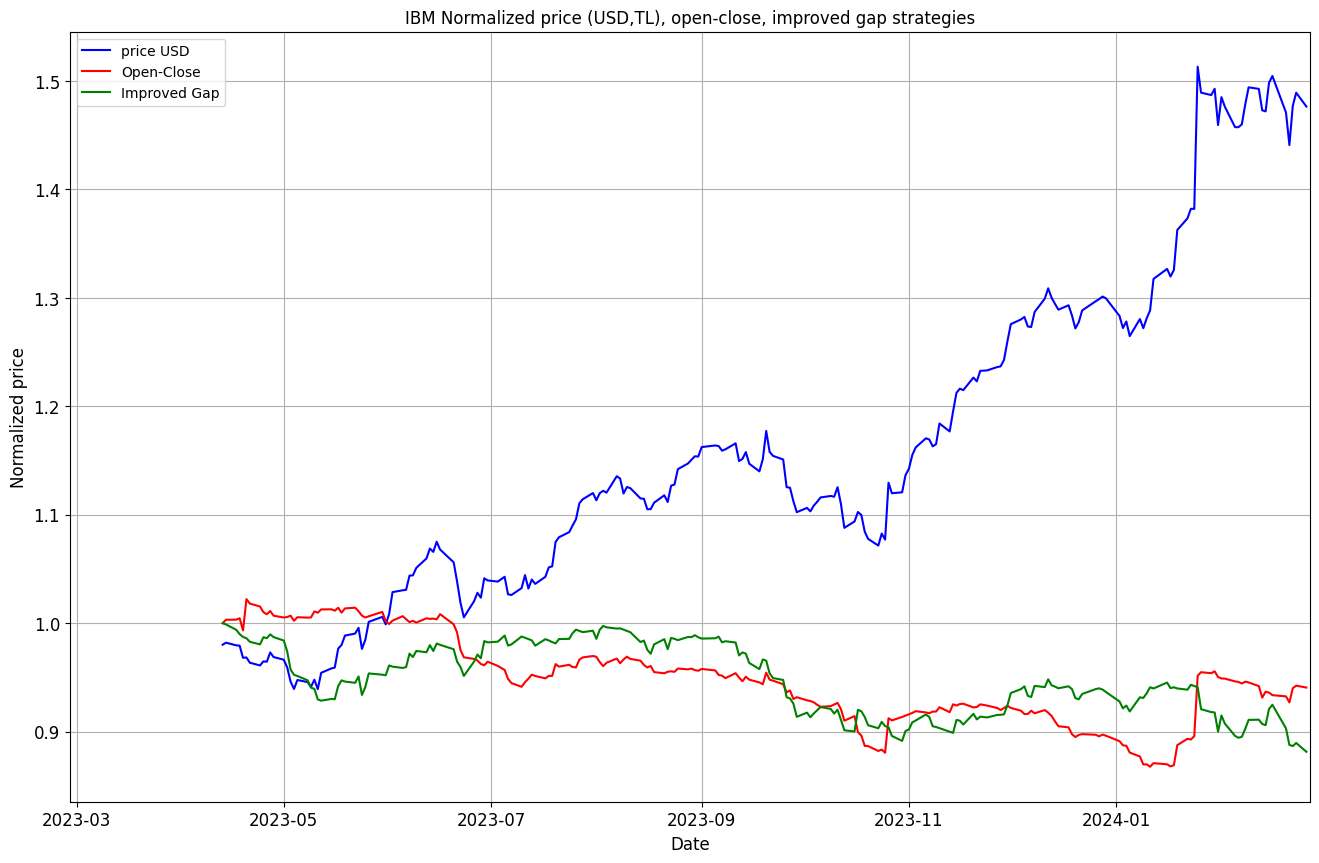


Creating Tear Sheet for IBM


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,59.3%
Cumulative returns,49.9%
Annual volatility,18.5%
Sharpe ratio,2.60
Calmar ratio,6.61
Stability,0.89
Max drawdown,-9.0%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-7.4%
Cumulative returns,-6.4%
Annual volatility,10.9%
Sharpe ratio,-0.65
Calmar ratio,-0.49
Stability,0.68
Max drawdown,-15.1%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for CAT : 



Updating data for CAT



Plotting for CAT

Plotting Open-Close Performance for CAT



<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


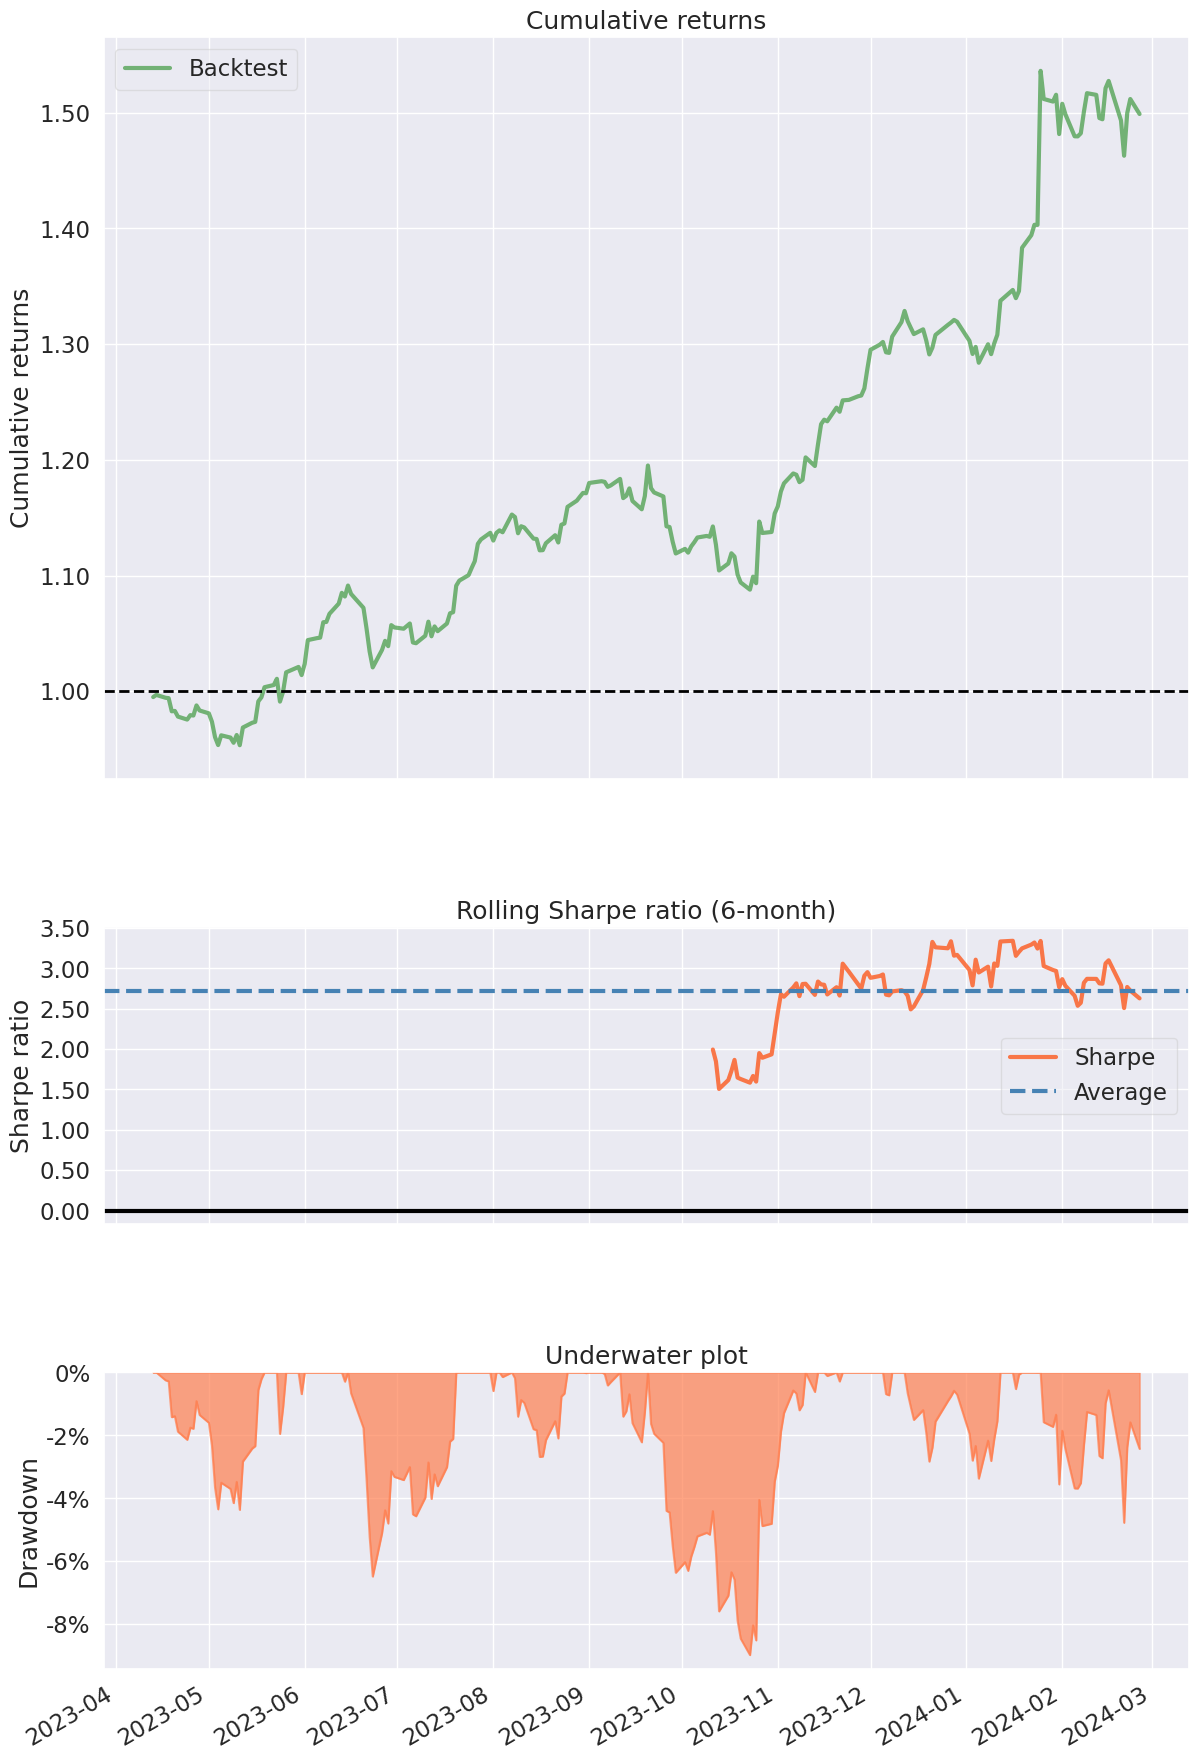

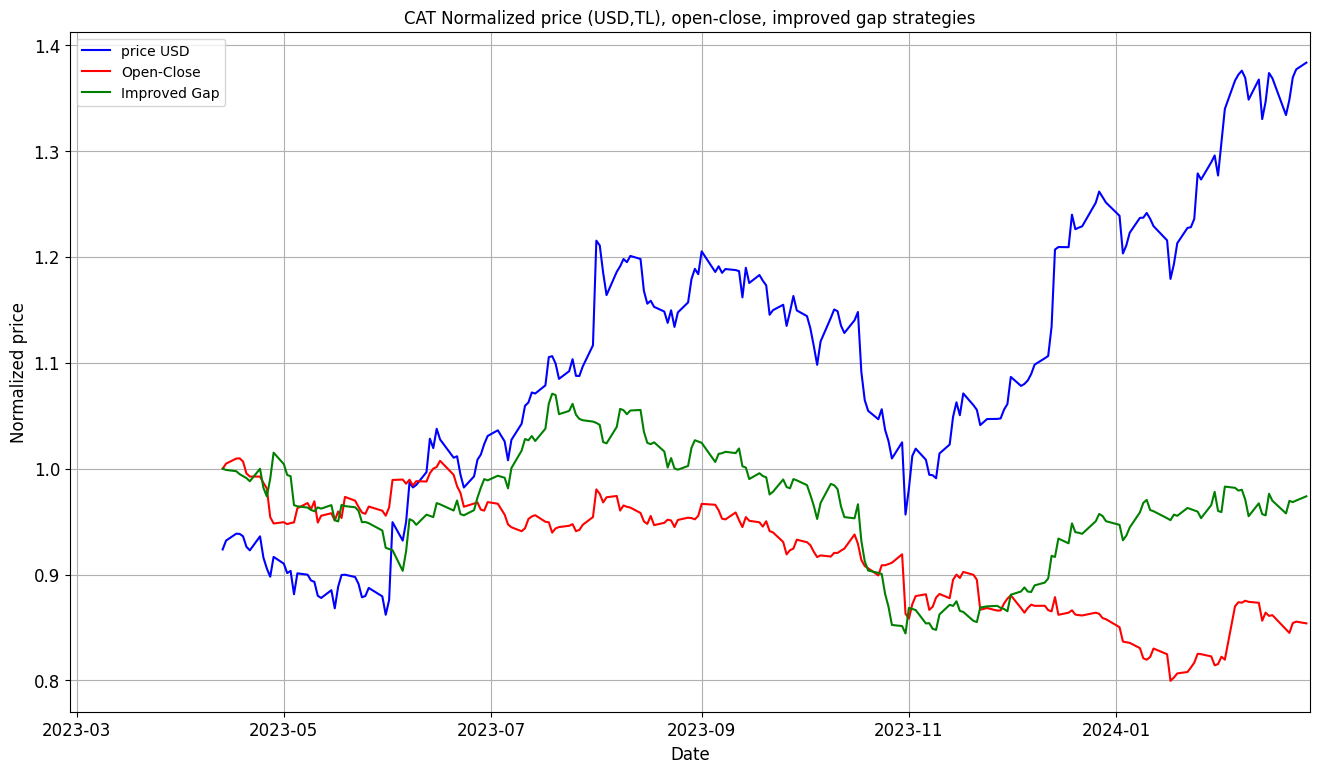


Creating Tear Sheet for CAT


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,60.1%
Cumulative returns,50.6%
Annual volatility,27.2%
Sharpe ratio,1.86
Calmar ratio,2.83
Stability,0.63
Max drawdown,-21.3%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-17.0%
Cumulative returns,-14.9%
Annual volatility,16.0%
Sharpe ratio,-1.09
Calmar ratio,-0.82
Stability,0.82
Max drawdown,-20.8%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for AXP : 



Updating data for AXP



Plotting for AXP

Plotting Open-Close Performance for AXP



<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


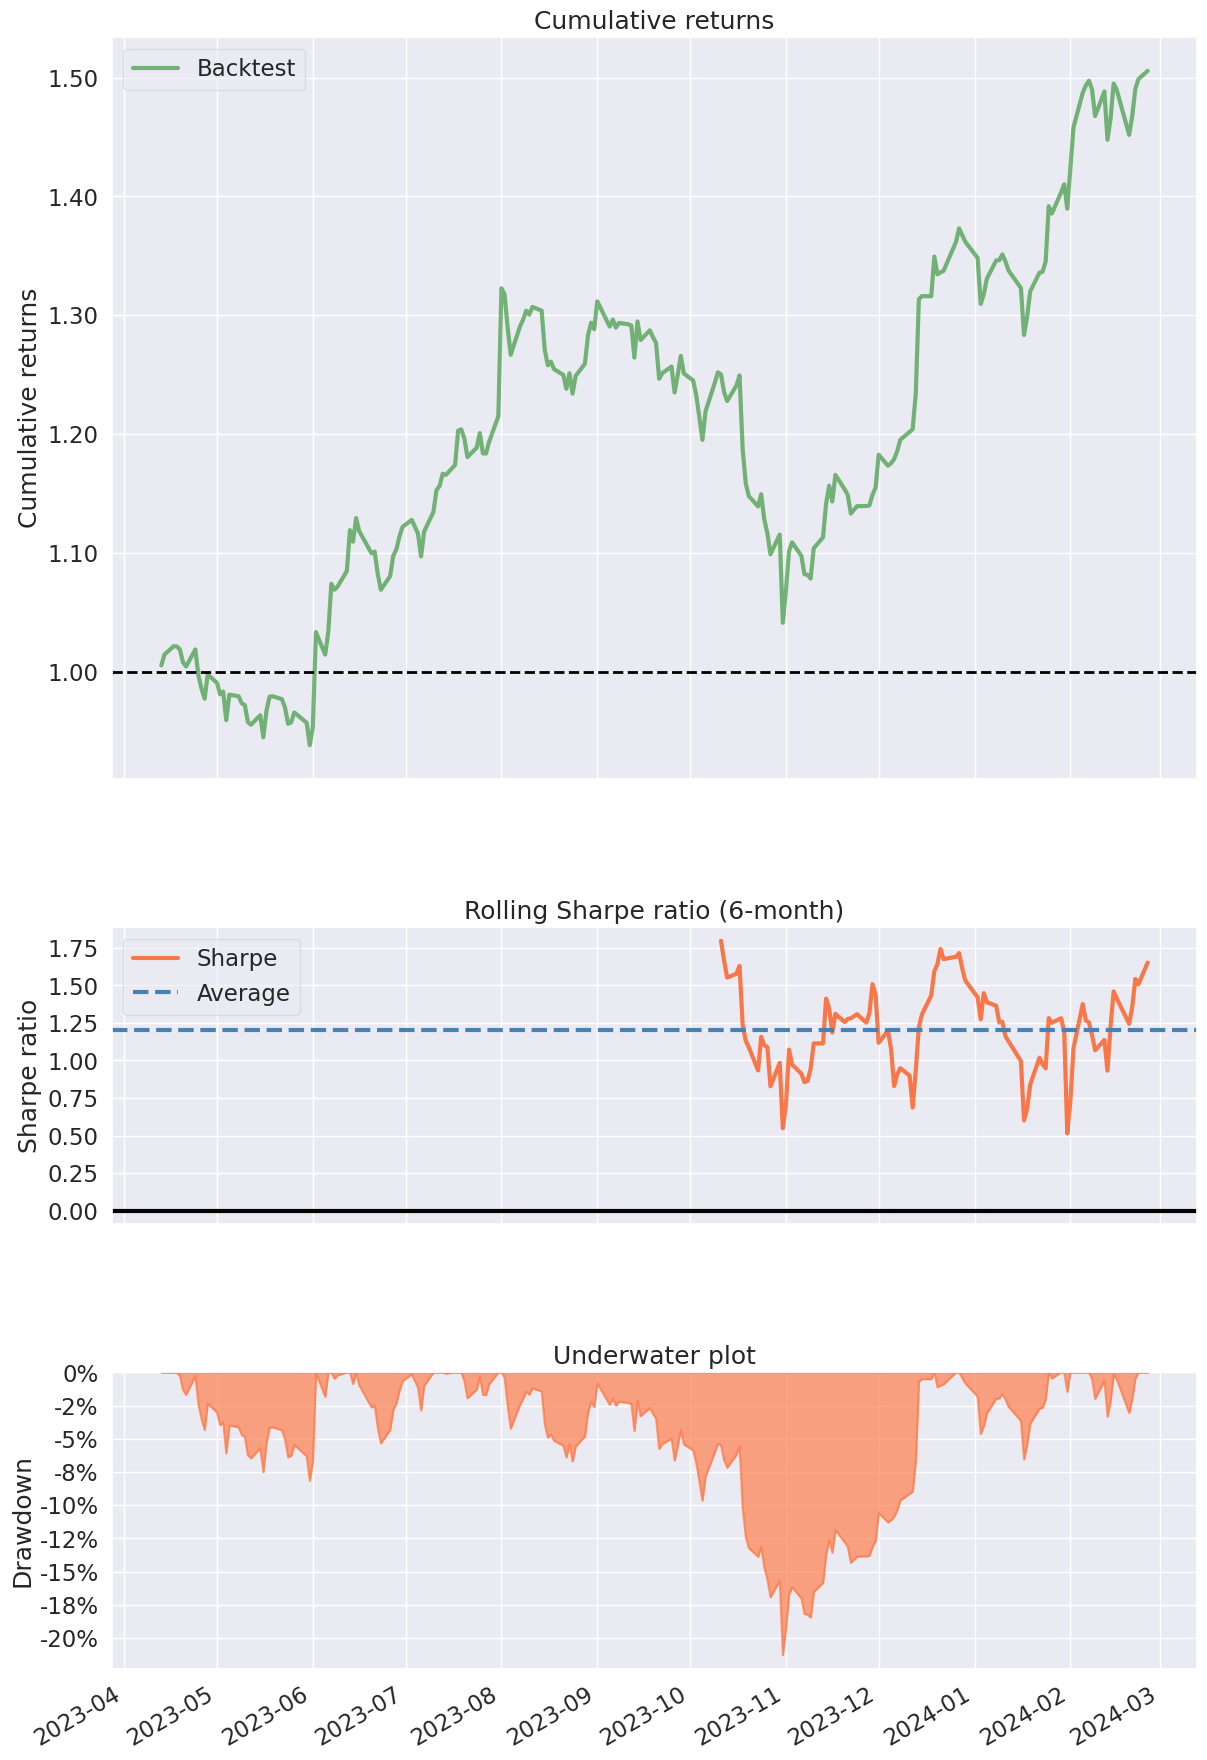

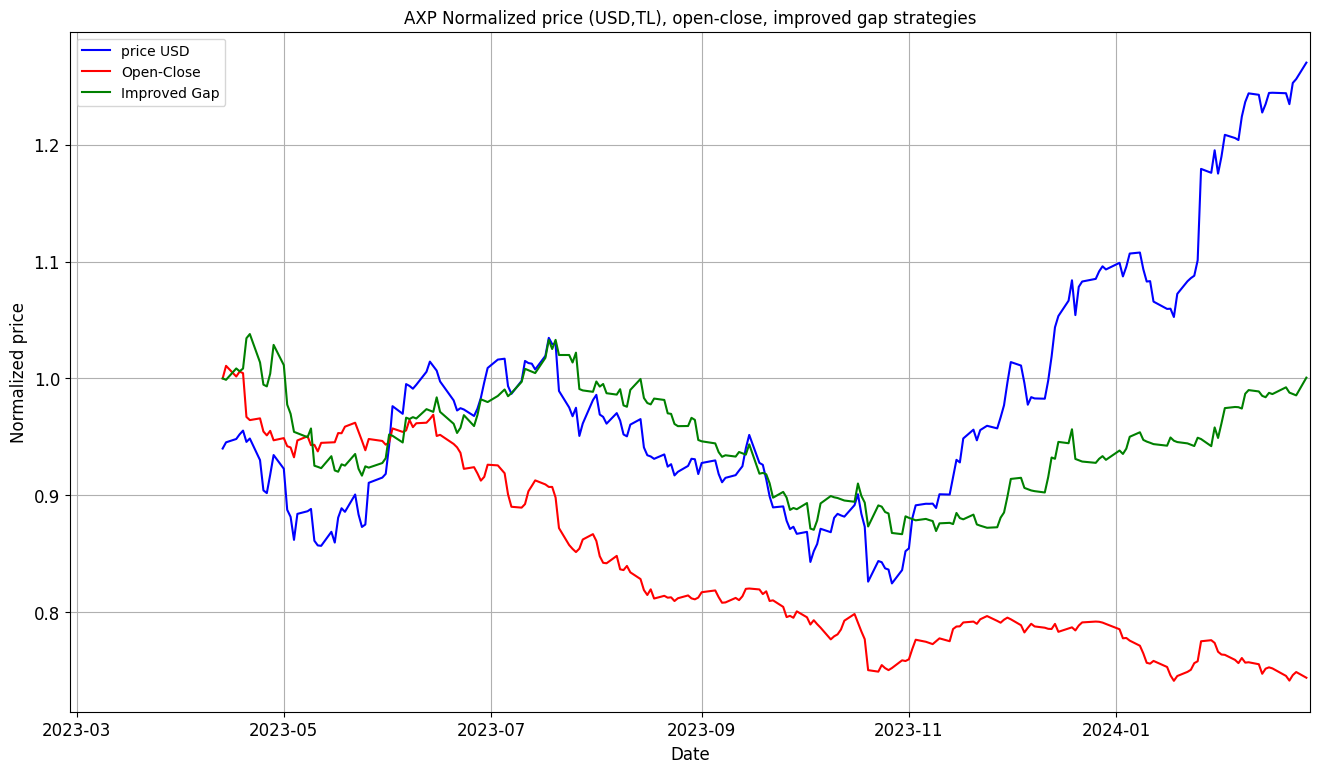


Creating Tear Sheet for AXP


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,44.5%
Cumulative returns,37.7%
Annual volatility,22.5%
Sharpe ratio,1.75
Calmar ratio,2.19
Stability,0.34
Max drawdown,-20.3%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-28.7%
Cumulative returns,-25.5%
Annual volatility,11.9%
Sharpe ratio,-2.78
Calmar ratio,-1.08
Stability,0.87
Max drawdown,-26.7%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for CRM : 



Updating data for CRM




[*********************100%%**********************]  1 of 1 completed
<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)




Plotting for CRM

Plotting Open-Close Performance for CRM


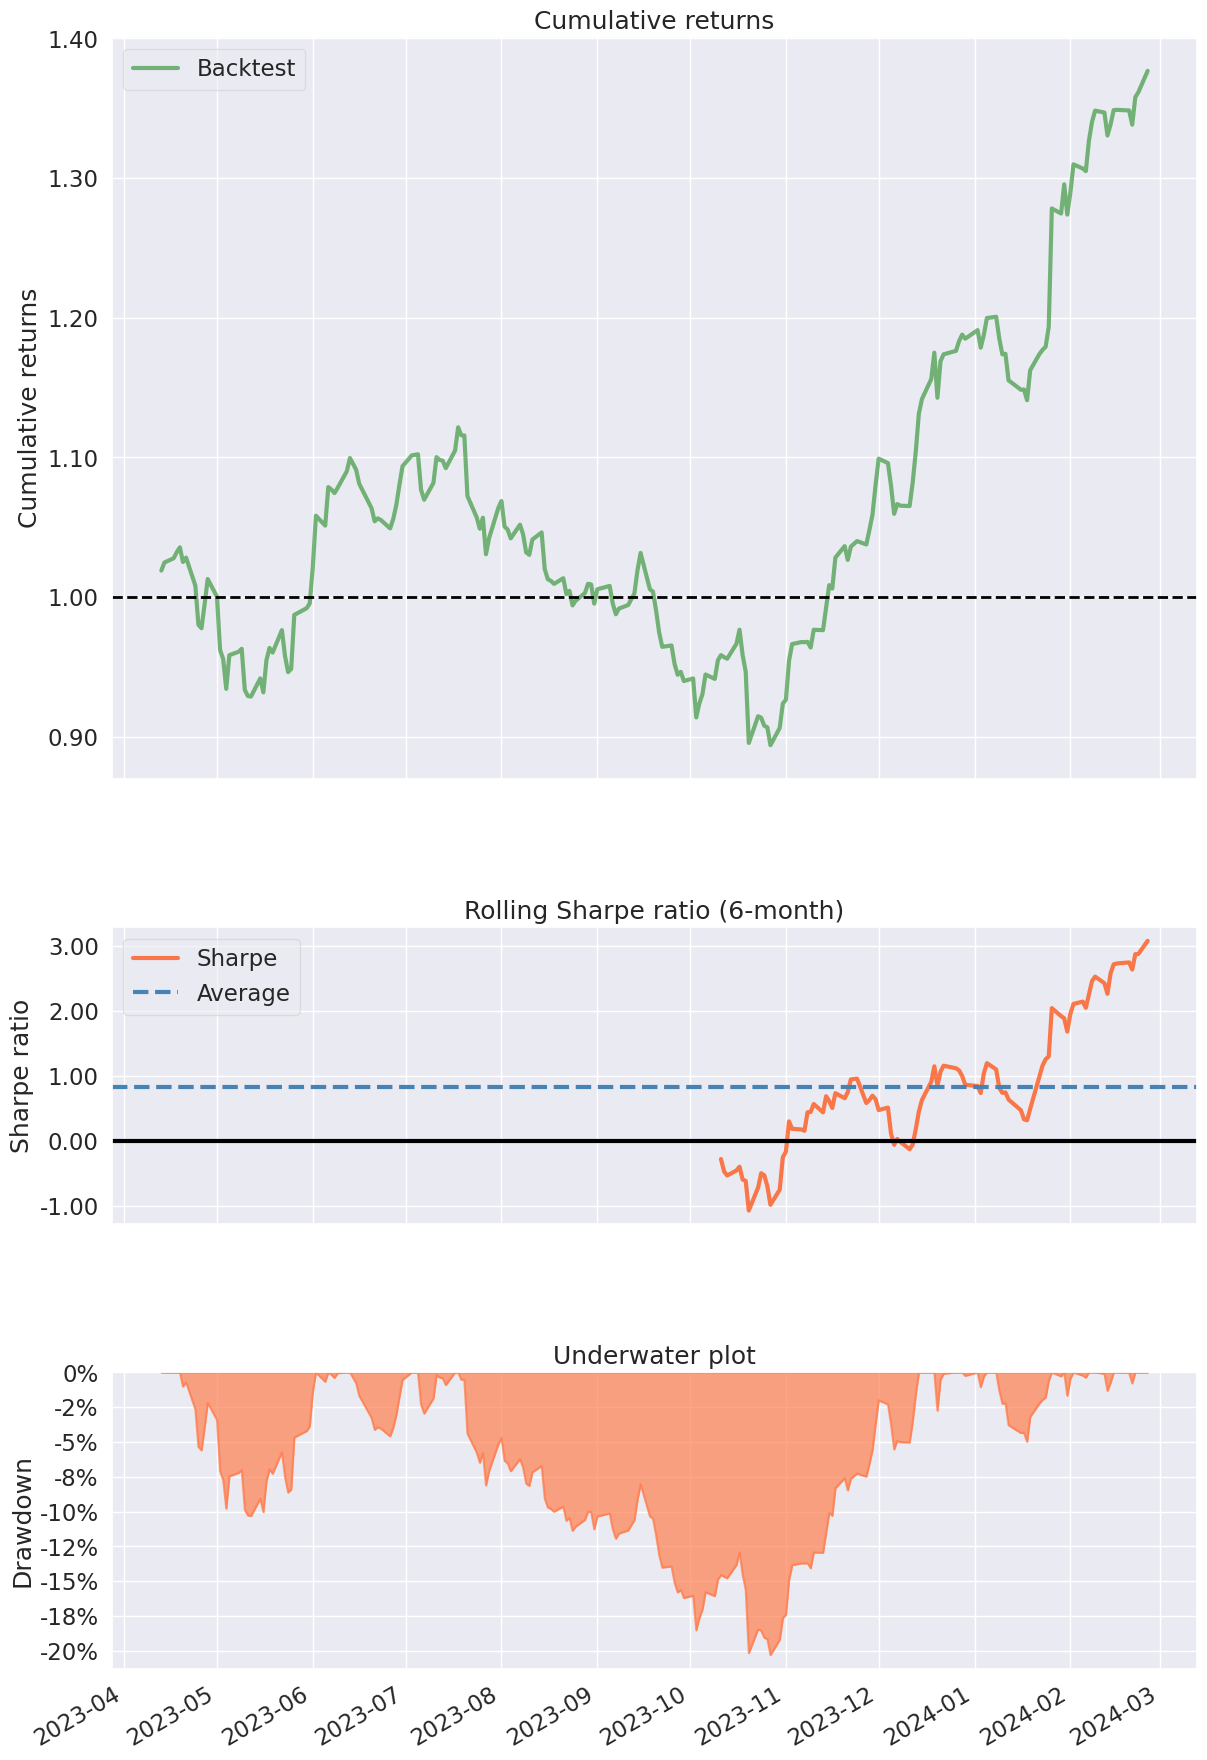

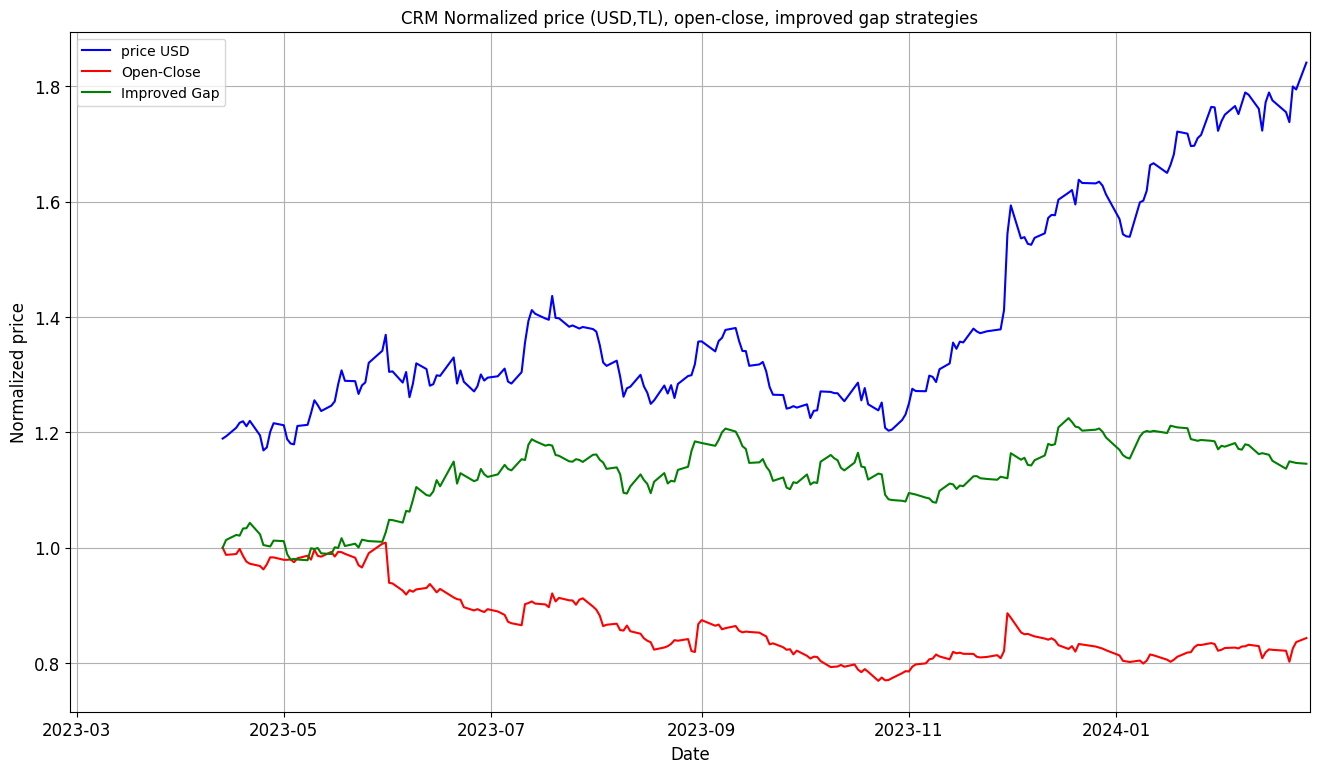


Creating Tear Sheet for CRM


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,69.1%
Cumulative returns,57.8%
Annual volatility,26.0%
Sharpe ratio,2.15
Calmar ratio,4.25
Stability,0.63
Max drawdown,-16.3%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-17.9%
Cumulative returns,-15.7%
Annual volatility,19.3%
Sharpe ratio,-0.92
Calmar ratio,-0.75
Stability,0.69
Max drawdown,-23.8%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for MCD : 



Updating data for MCD



Plotting for MCD

Plotting Open-Close Performance for MCD



<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


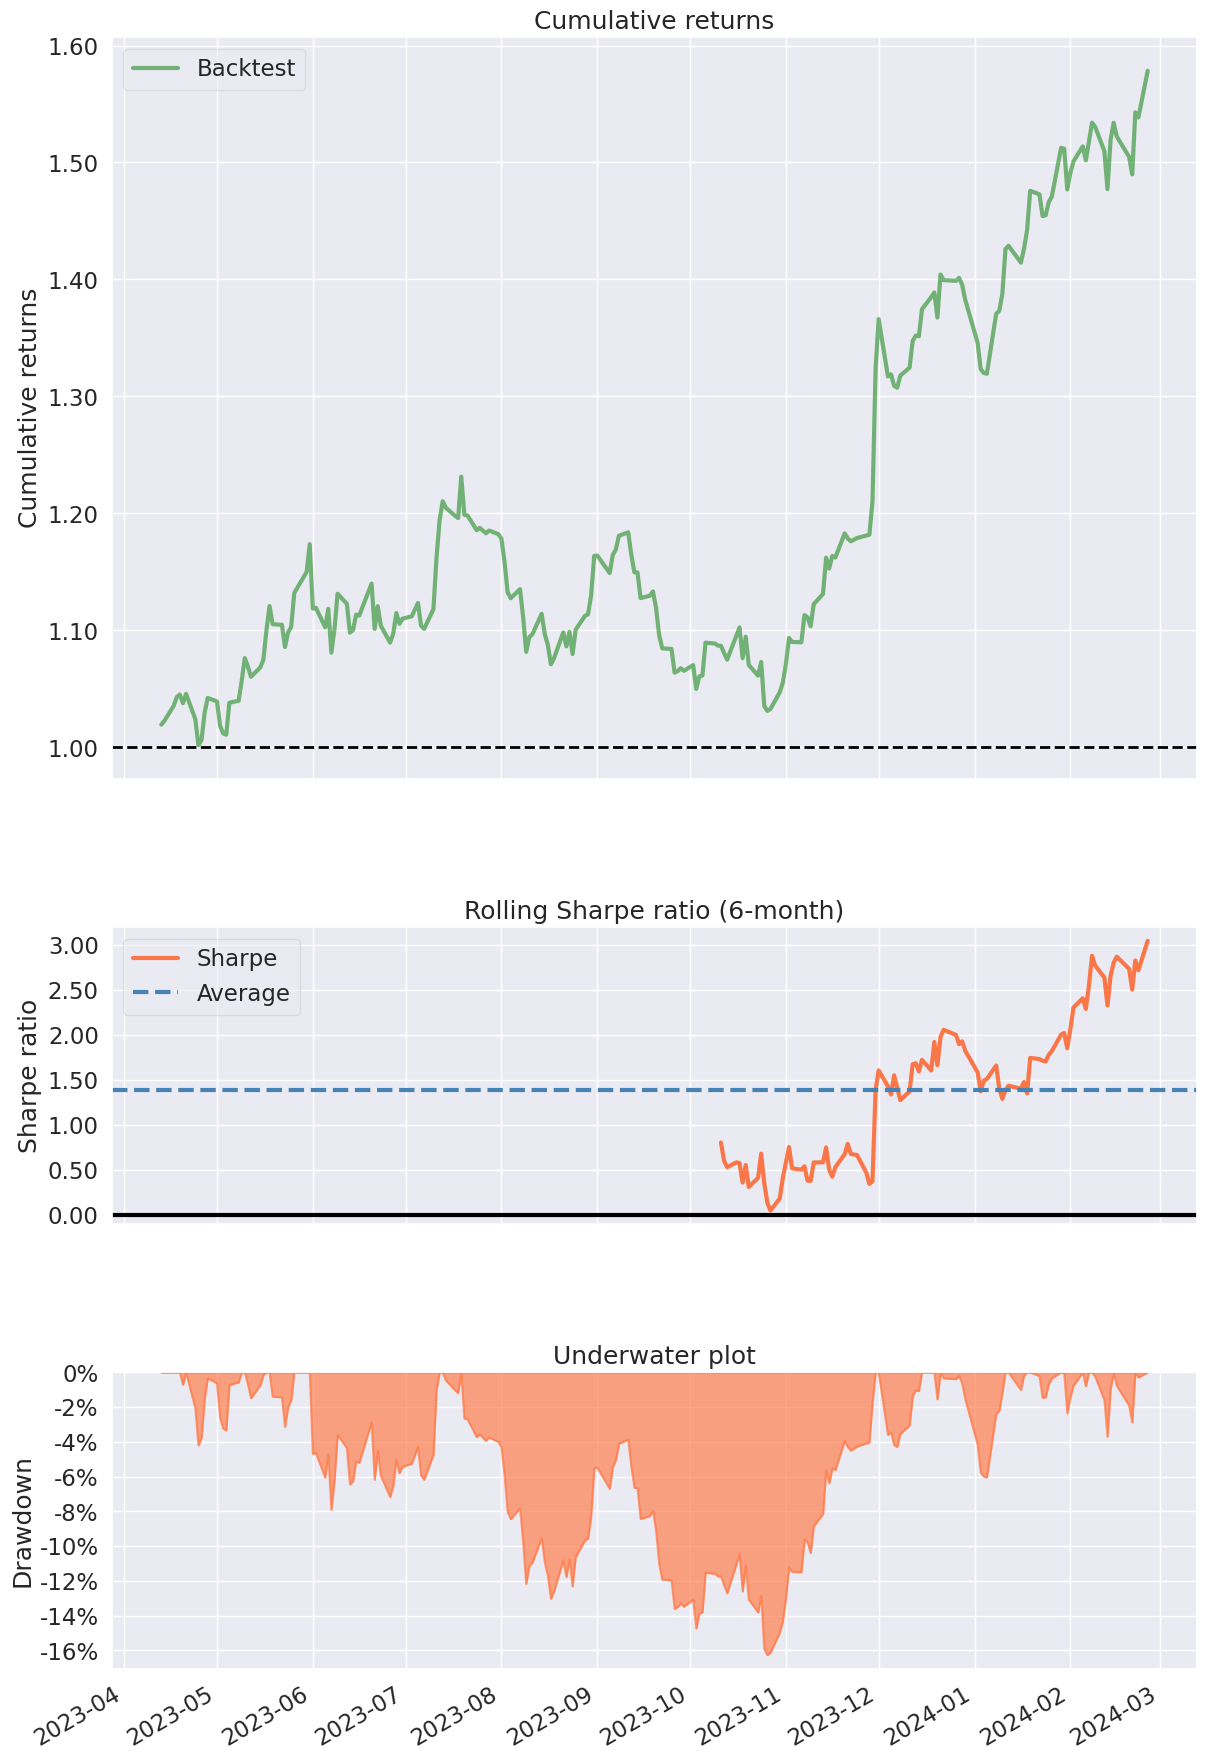

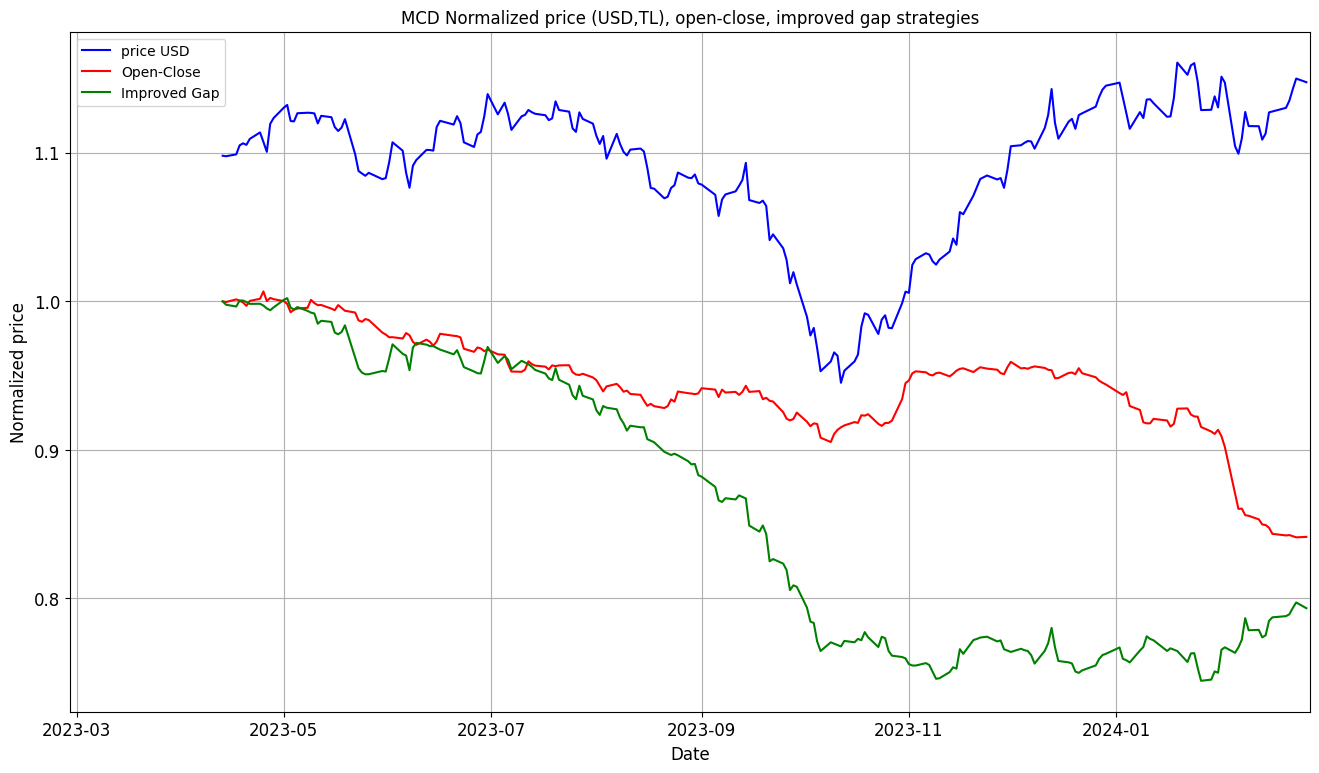


Creating Tear Sheet for MCD


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,6.8%
Cumulative returns,5.9%
Annual volatility,13.9%
Sharpe ratio,0.54
Calmar ratio,0.40
Stability,0.00
Max drawdown,-17.1%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-17.7%
Cumulative returns,-15.6%
Annual volatility,6.8%
Sharpe ratio,-2.84
Calmar ratio,-1.08
Stability,0.61
Max drawdown,-16.4%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for V : 



Updating data for V



Plotting for V

Plotting Open-Close Performance for V



<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


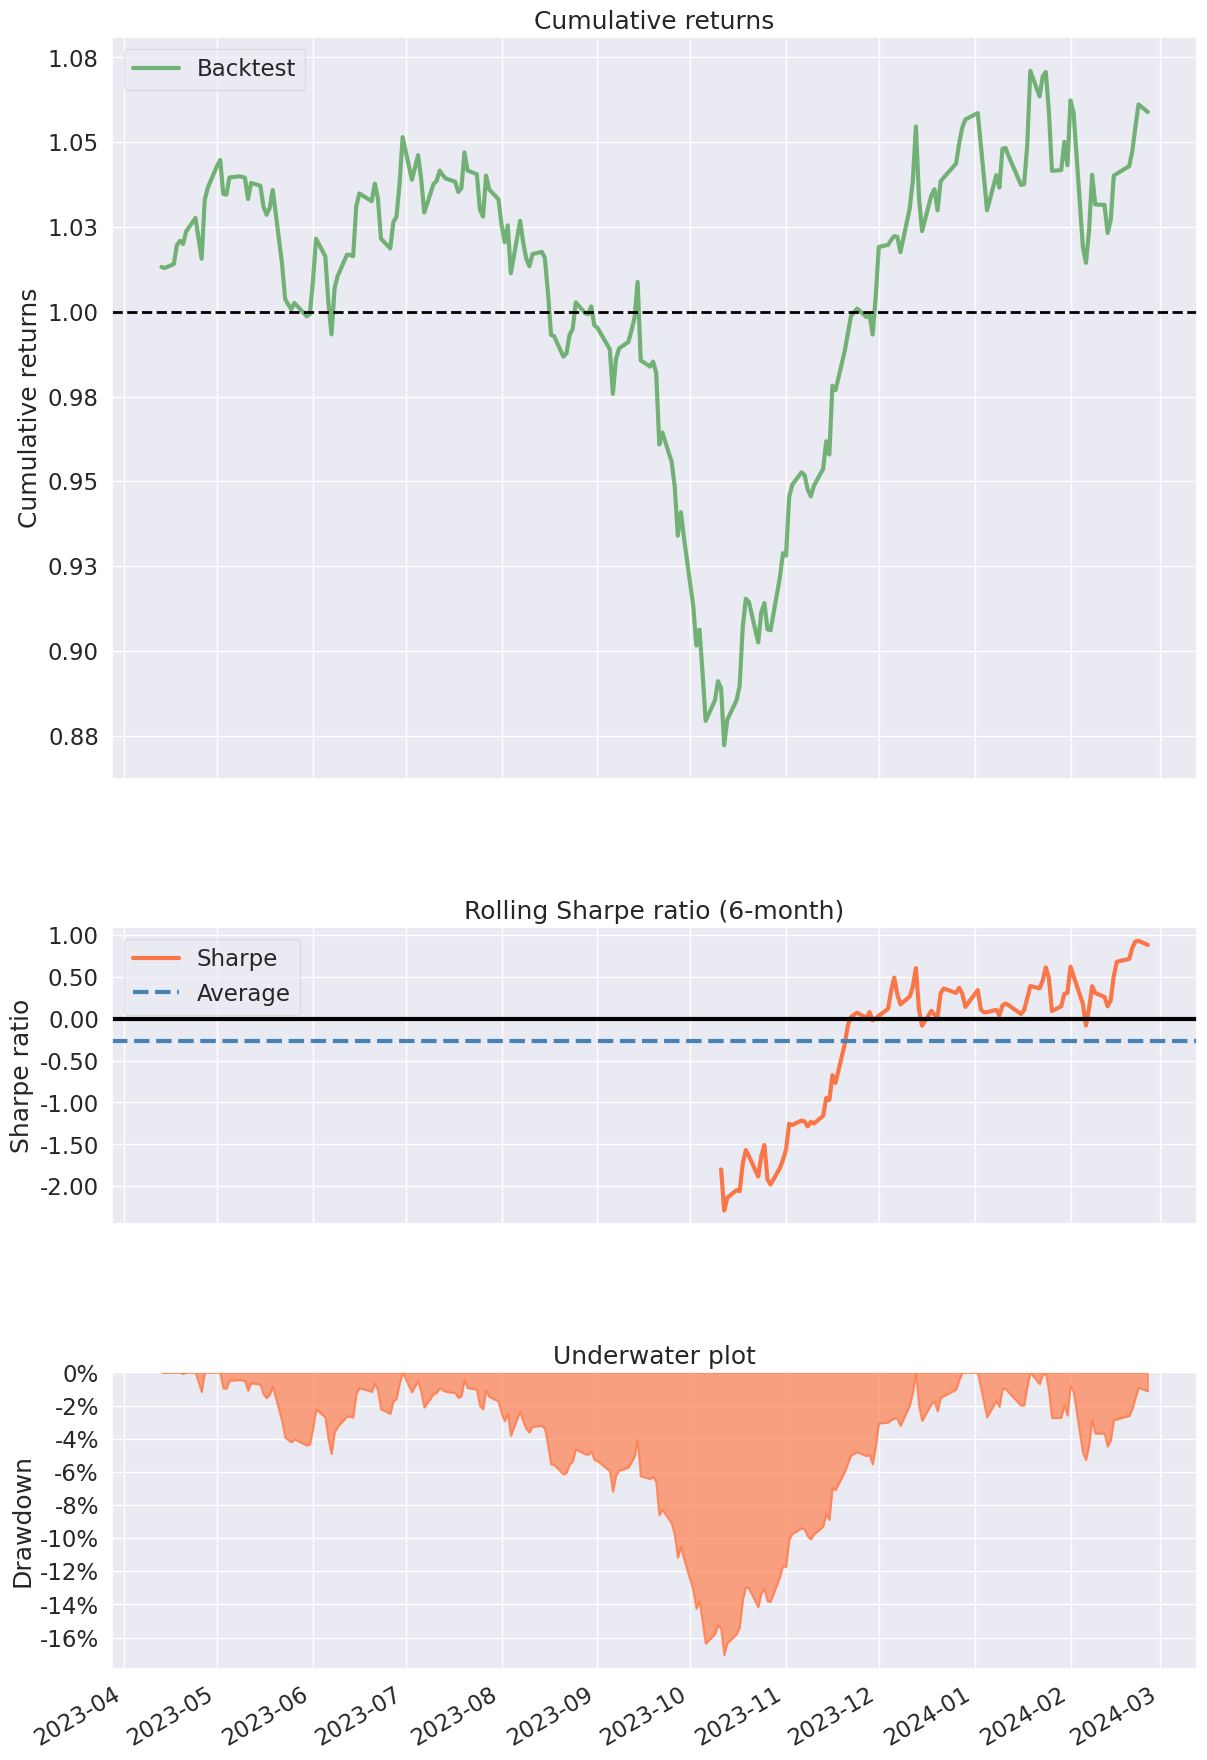

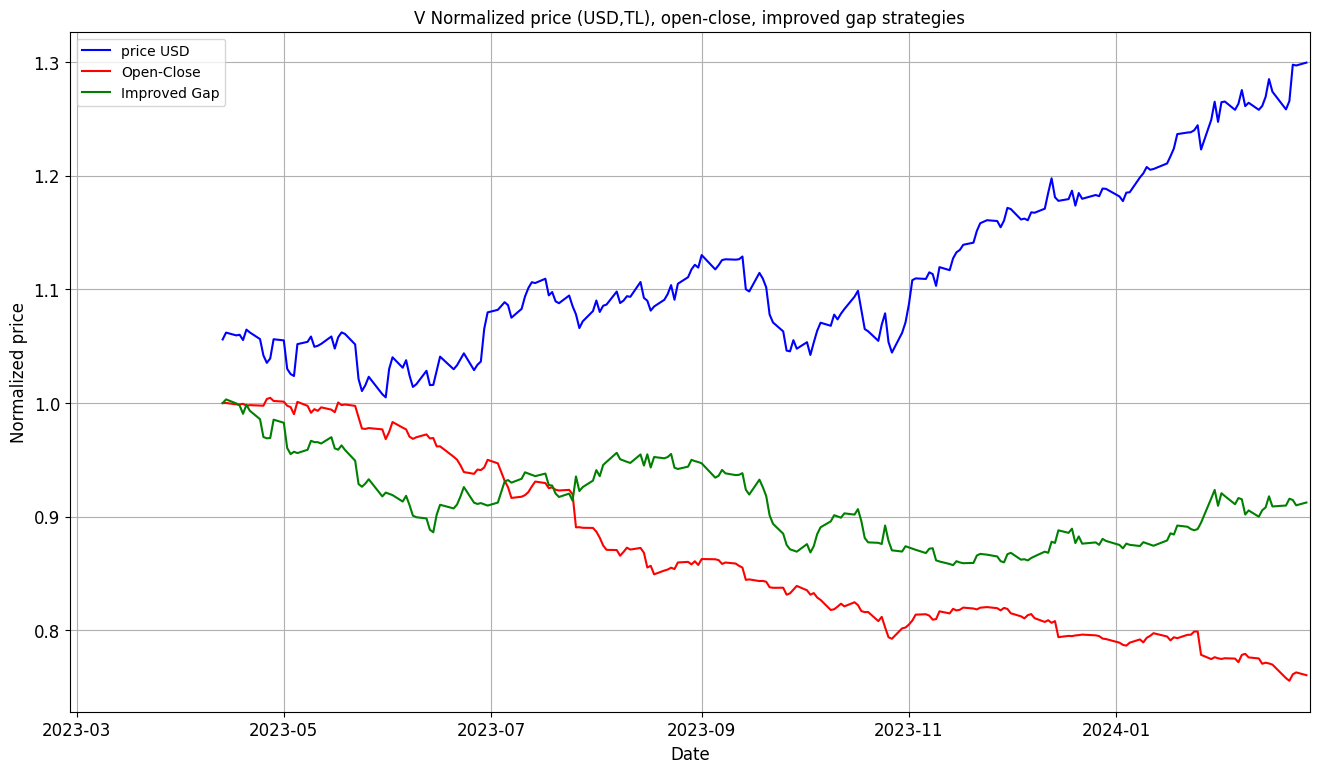


Creating Tear Sheet for V


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,30.1%
Cumulative returns,25.7%
Annual volatility,14.9%
Sharpe ratio,1.84
Calmar ratio,3.87
Stability,0.76
Max drawdown,-7.8%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-26.5%
Cumulative returns,-23.5%
Annual volatility,8.4%
Sharpe ratio,-3.61
Calmar ratio,-1.07
Stability,0.94
Max drawdown,-24.8%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for JNJ : 



Updating data for JNJ




<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)




Plotting for JNJ

Plotting Open-Close Performance for JNJ


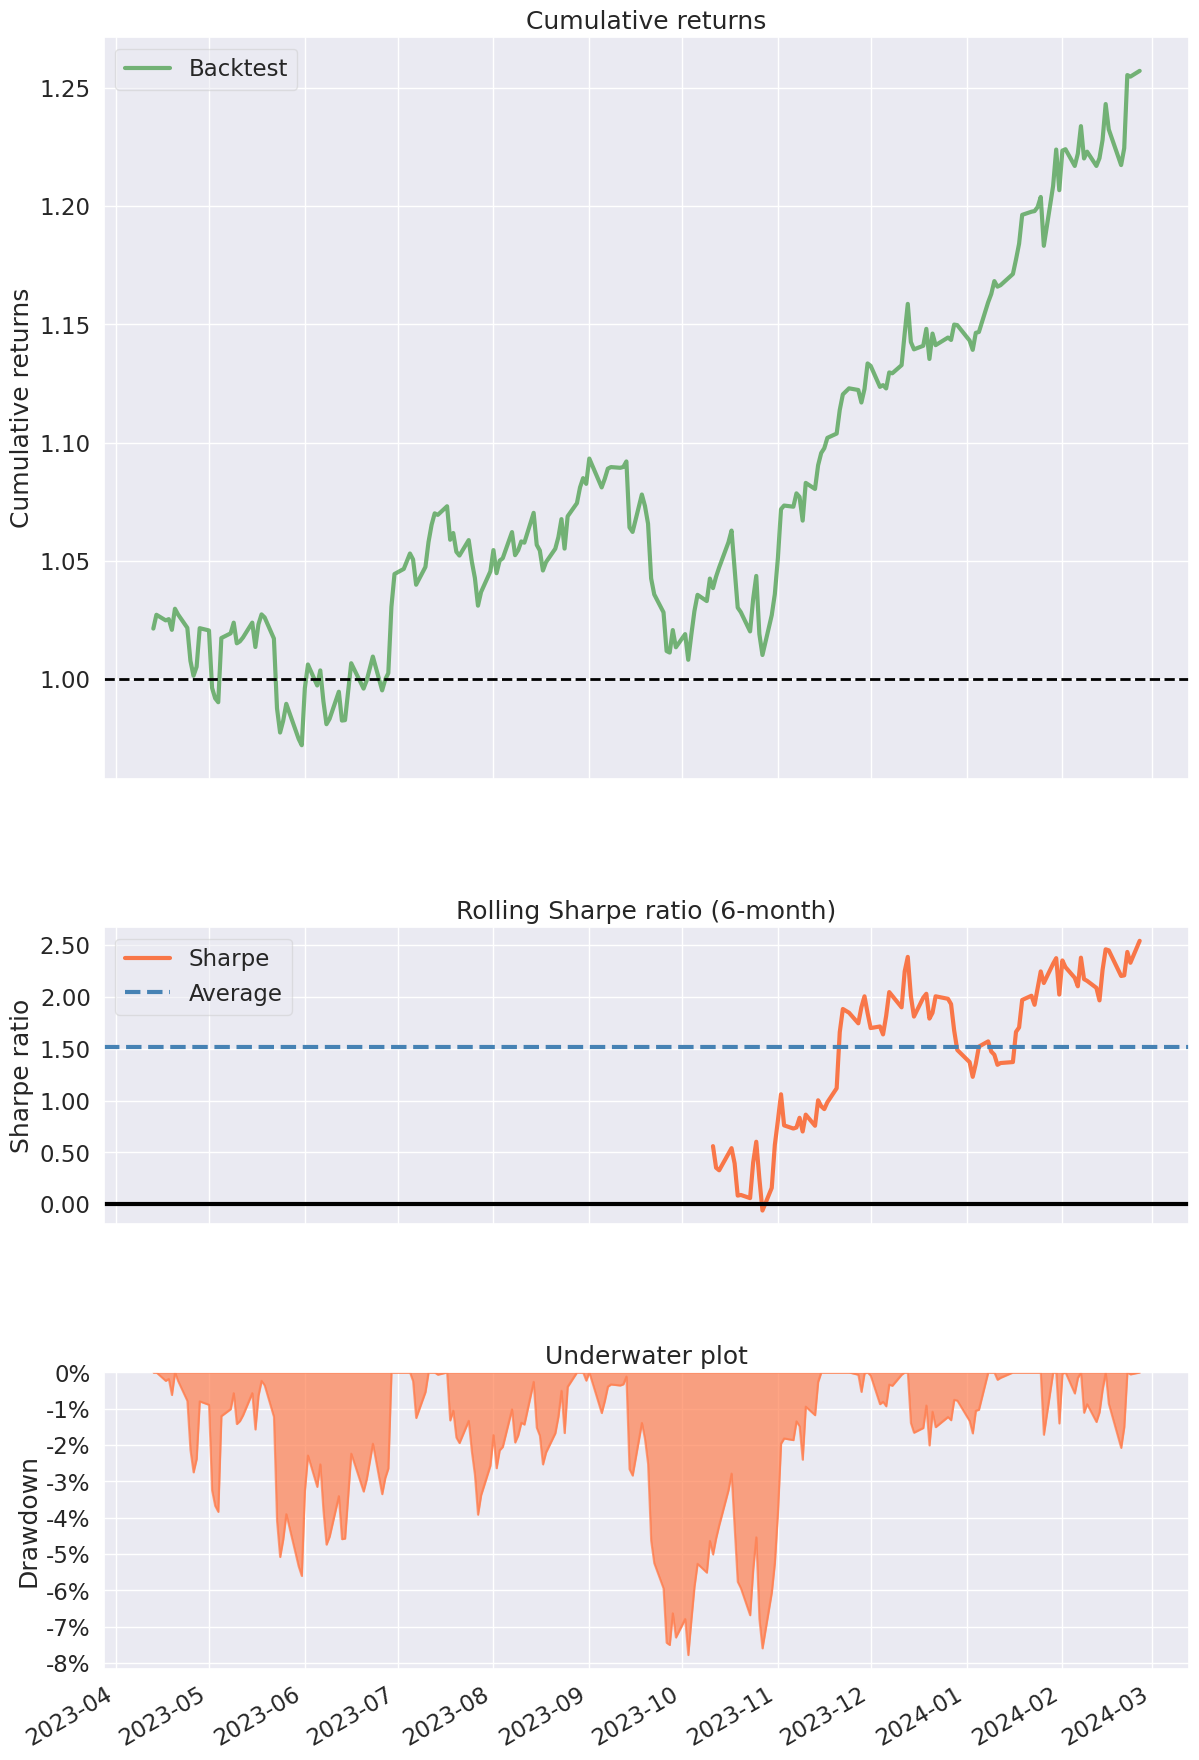

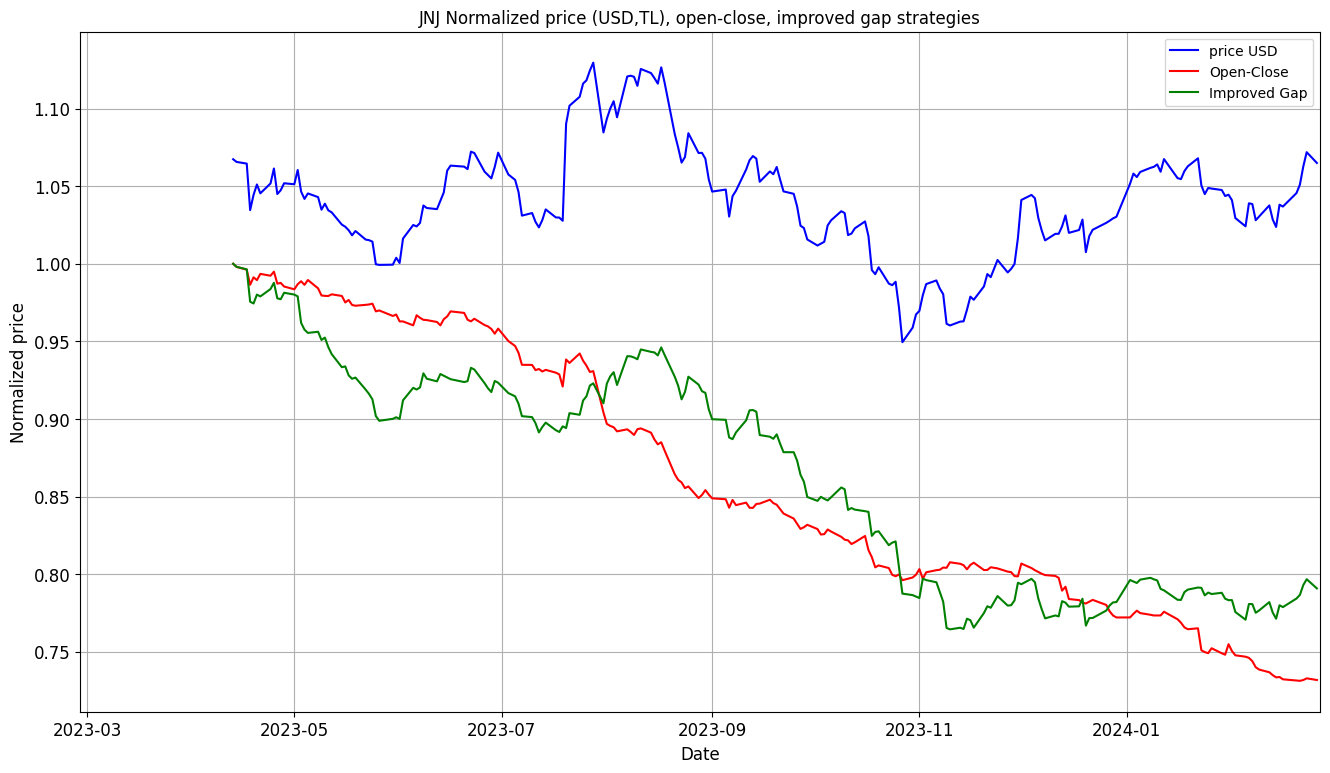


Creating Tear Sheet for JNJ


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,1.3%
Cumulative returns,1.1%
Annual volatility,15.5%
Sharpe ratio,0.16
Calmar ratio,0.08
Stability,0.05
Max drawdown,-15.9%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-30.2%
Cumulative returns,-26.8%
Annual volatility,7.0%
Sharpe ratio,-5.08
Calmar ratio,-1.12
Stability,0.97
Max drawdown,-26.9%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for TRV : 



Updating data for TRV



Plotting for TRV

Plotting Open-Close Performance for TRV



<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


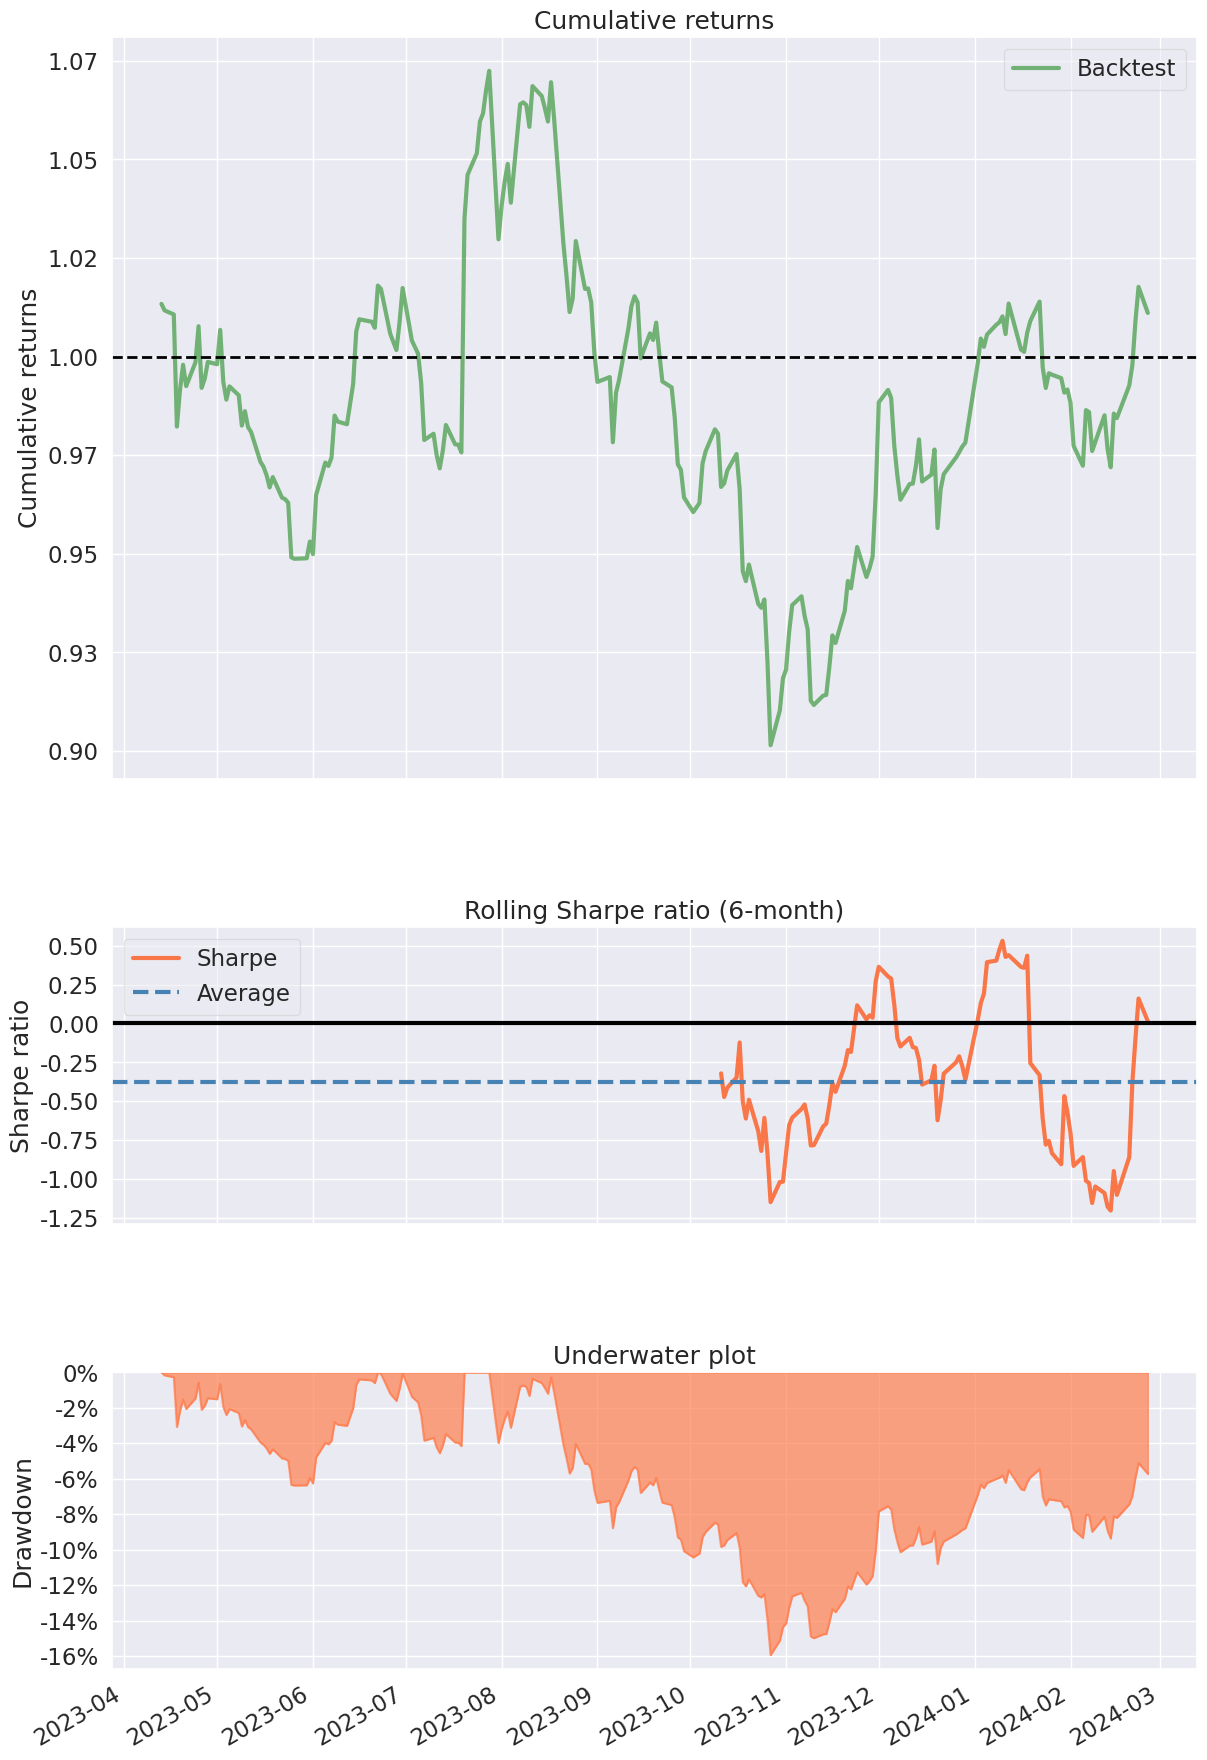

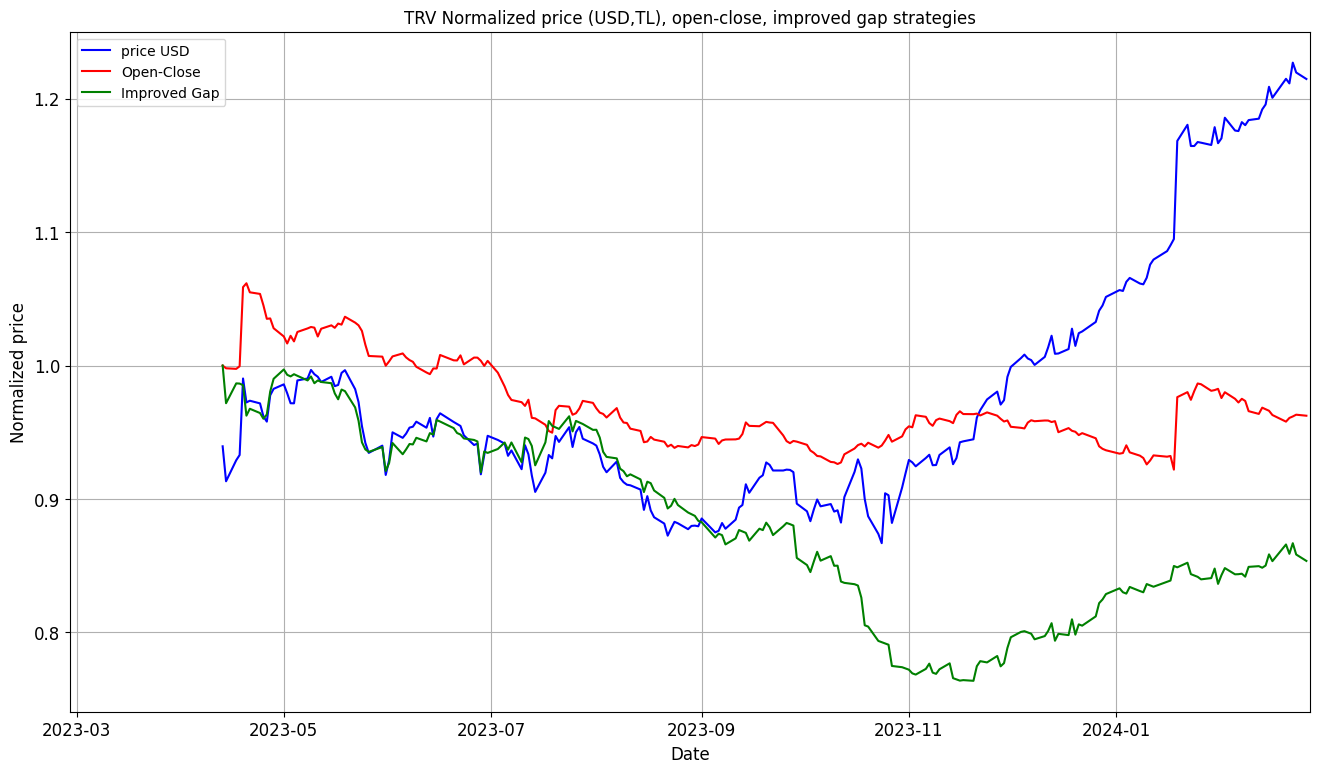


Creating Tear Sheet for TRV


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,33.8%
Cumulative returns,28.8%
Annual volatility,18.8%
Sharpe ratio,1.64
Calmar ratio,2.60
Stability,0.34
Max drawdown,-13.0%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-5.7%
Cumulative returns,-5.0%
Annual volatility,11.4%
Sharpe ratio,-0.46
Calmar ratio,-0.44
Stability,0.43
Max drawdown,-13.2%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Showing Ticker Stats for WMT : 



Updating data for WMT




<ipython-input-15-f18de8428dd5>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)




Plotting for WMT

Plotting Open-Close Performance for WMT


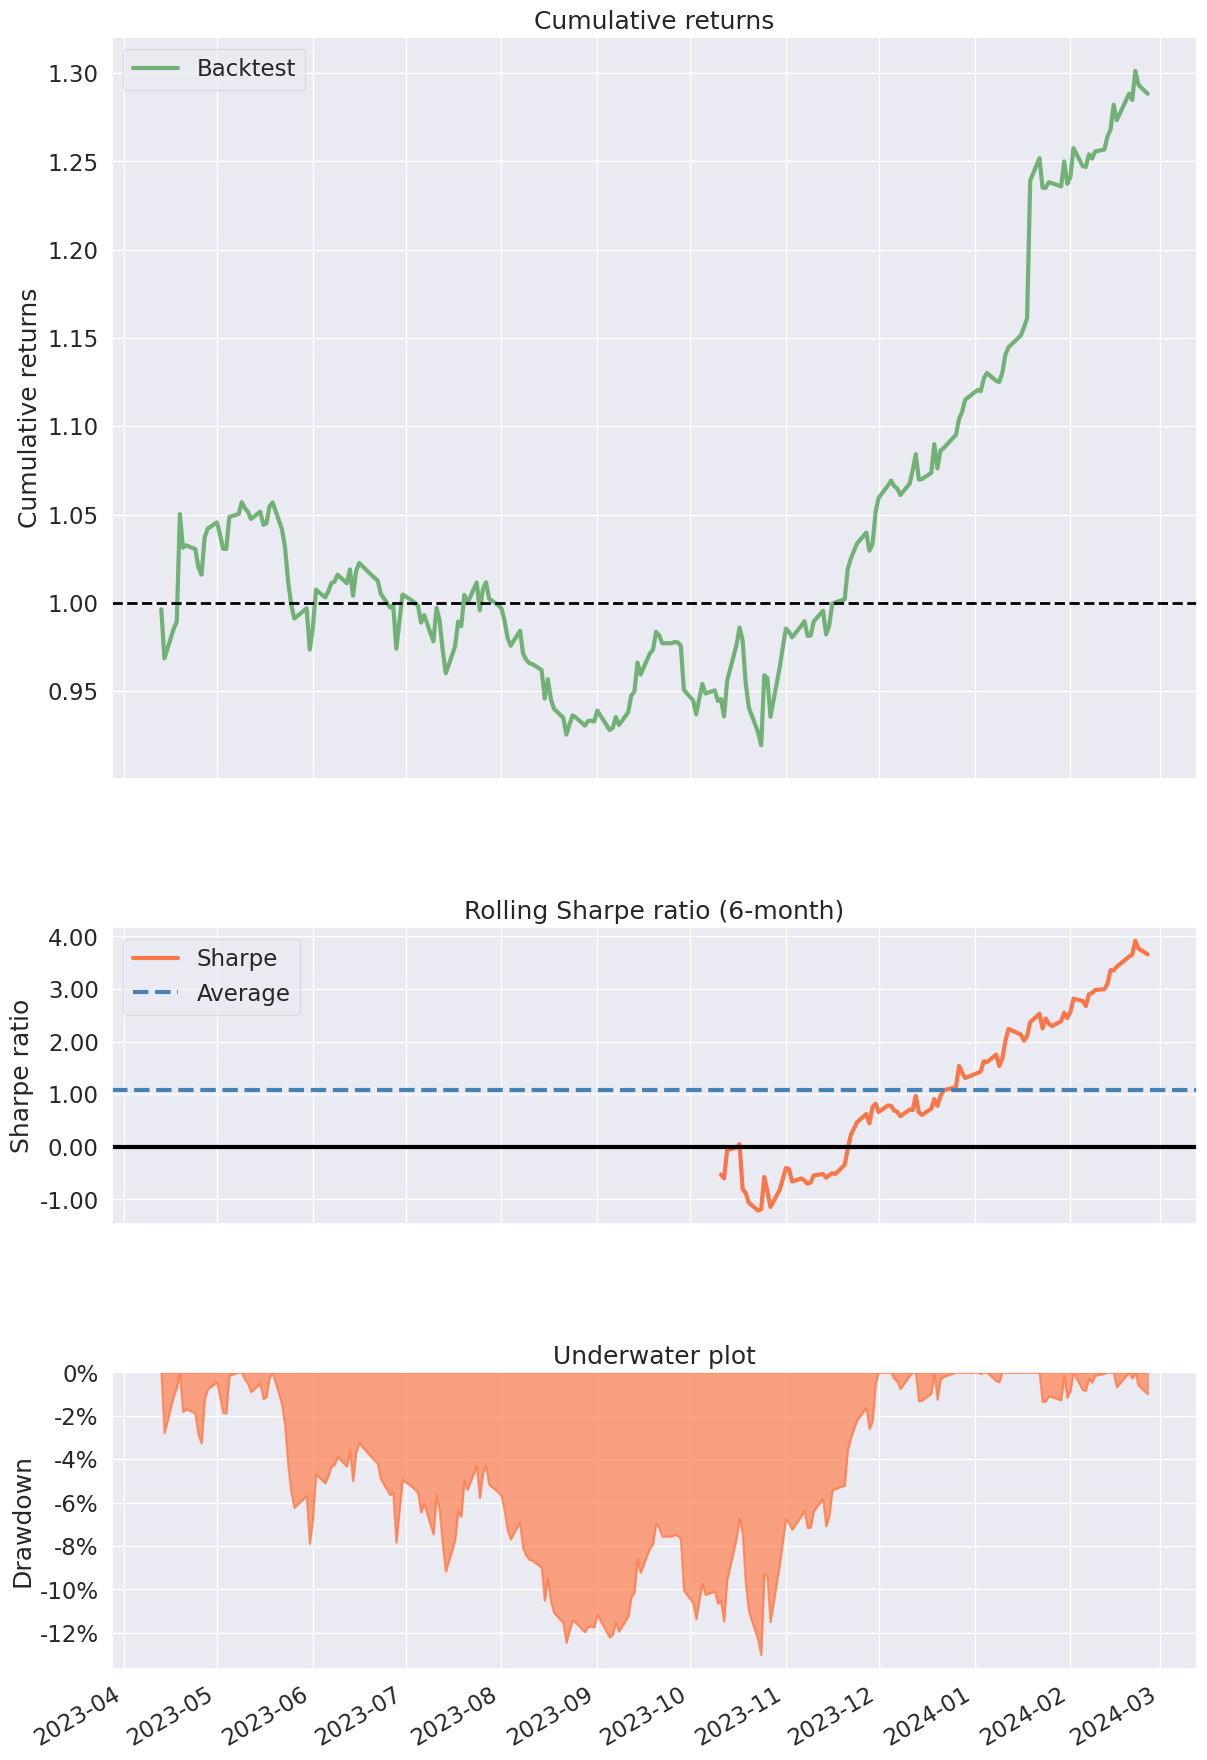

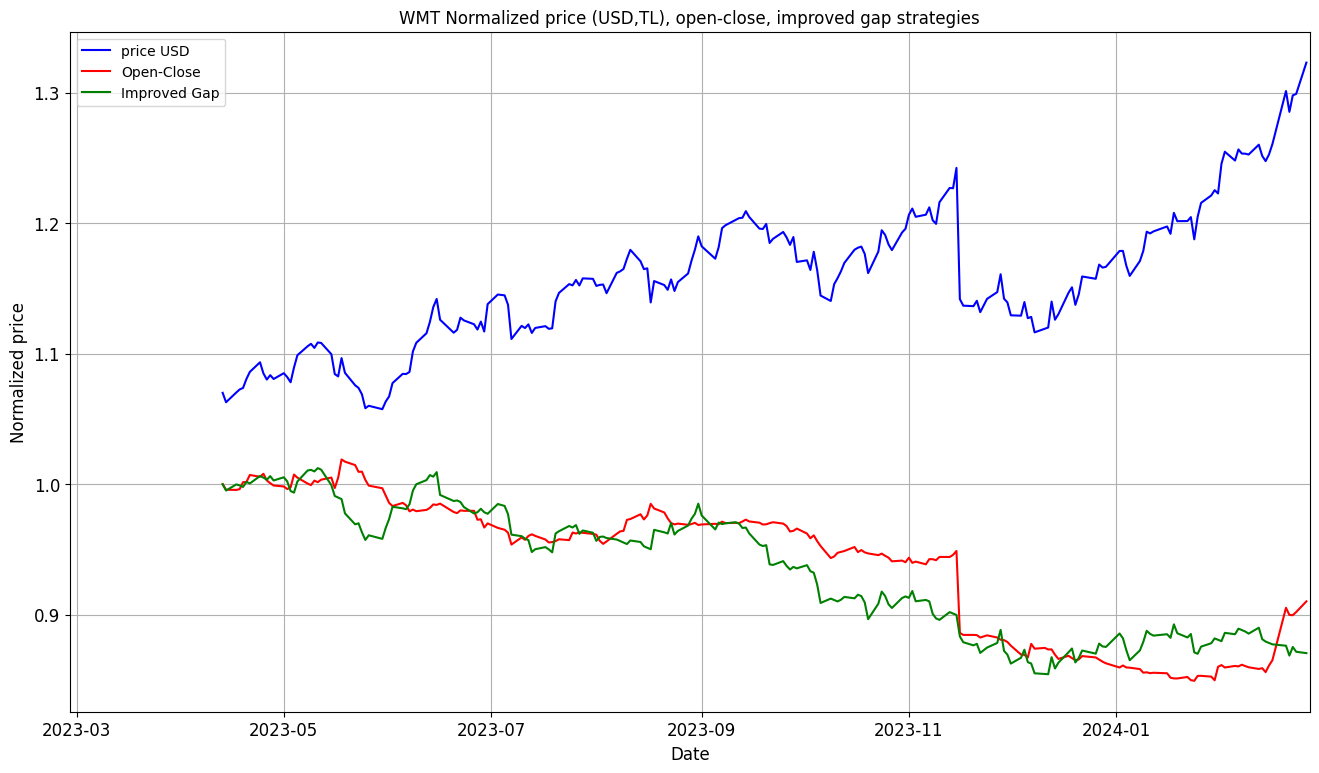


Creating Tear Sheet for WMT


If we buy and hold performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,27.8%
Cumulative returns,23.8%
Annual volatility,15.5%
Sharpe ratio,1.66
Calmar ratio,2.74
Stability,0.63
Max drawdown,-10.1%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])



If we apply open-close strategy, performance would be:



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-04-13
End date,2024-02-26
Total months,10
,Backtest
Annual return,-10.2%
Cumulative returns,-8.9%
Annual volatility,10.3%
Sharpe ratio,-0.99
Calmar ratio,-0.61
Stability,0.83
Max drawdown,-16.7%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
[*********************100%%**********************]  1 of 1 completed

  Ticker  Open-Close     Close       Eff  PWin_OC   PWin
0    IBM    0.912394  1.476514  0.617938    0.393  0.611
1    CAT    0.819698  1.383432  0.592510    0.510  0.605
2    AXP    0.727904  1.270151  0.573085    0.490  0.592
3    CRM    0.919200  1.841302  0.499212    0.457  0.585
4    MCD    0.821868  1.147544  0.716198    0.424  0.583
5      V    0.729146  1.299658  0.561029    0.380  0.581
6    JNJ    0.744099  1.064930  0.698731    0.329  0.571
7    TRV    0.912197  1.214734  0.750944    0.419  0.569
8    WMT    0.902982  1.323102  0.682474    0.376  0.567




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Analysis date and time = 27/02/2024 18:21:48


List for Open-Close:
Empty DataFrame
Columns: [Ticker, Open-Close, Close, Eff, PWin_OC, PWin]
Index: []


List for Long:
Empty DataFrame
Columns: [Ticker, Open-Close, Close, Eff, PWin_OC, PWin]
Index: []
Empty DataFrame
Columns: [Ticker, Open-Close, Close, Eff, PWin_OC, PWin]
Index: []

Here is our most probable winner list (for TR = 0.0) :

Analysis date and time = 27/02/2024 18:21:48






Out of 0, there are 0 assets have PWin_OC > 0.56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>







Out of 9, there are 0 assets have PWin_OC > 0.56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>







Out of 0, there are 0 assets have PWin_OC > 0.56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

..........END OF ASSET SELECTION.........................
--- 67.88400983810425 seconds ---


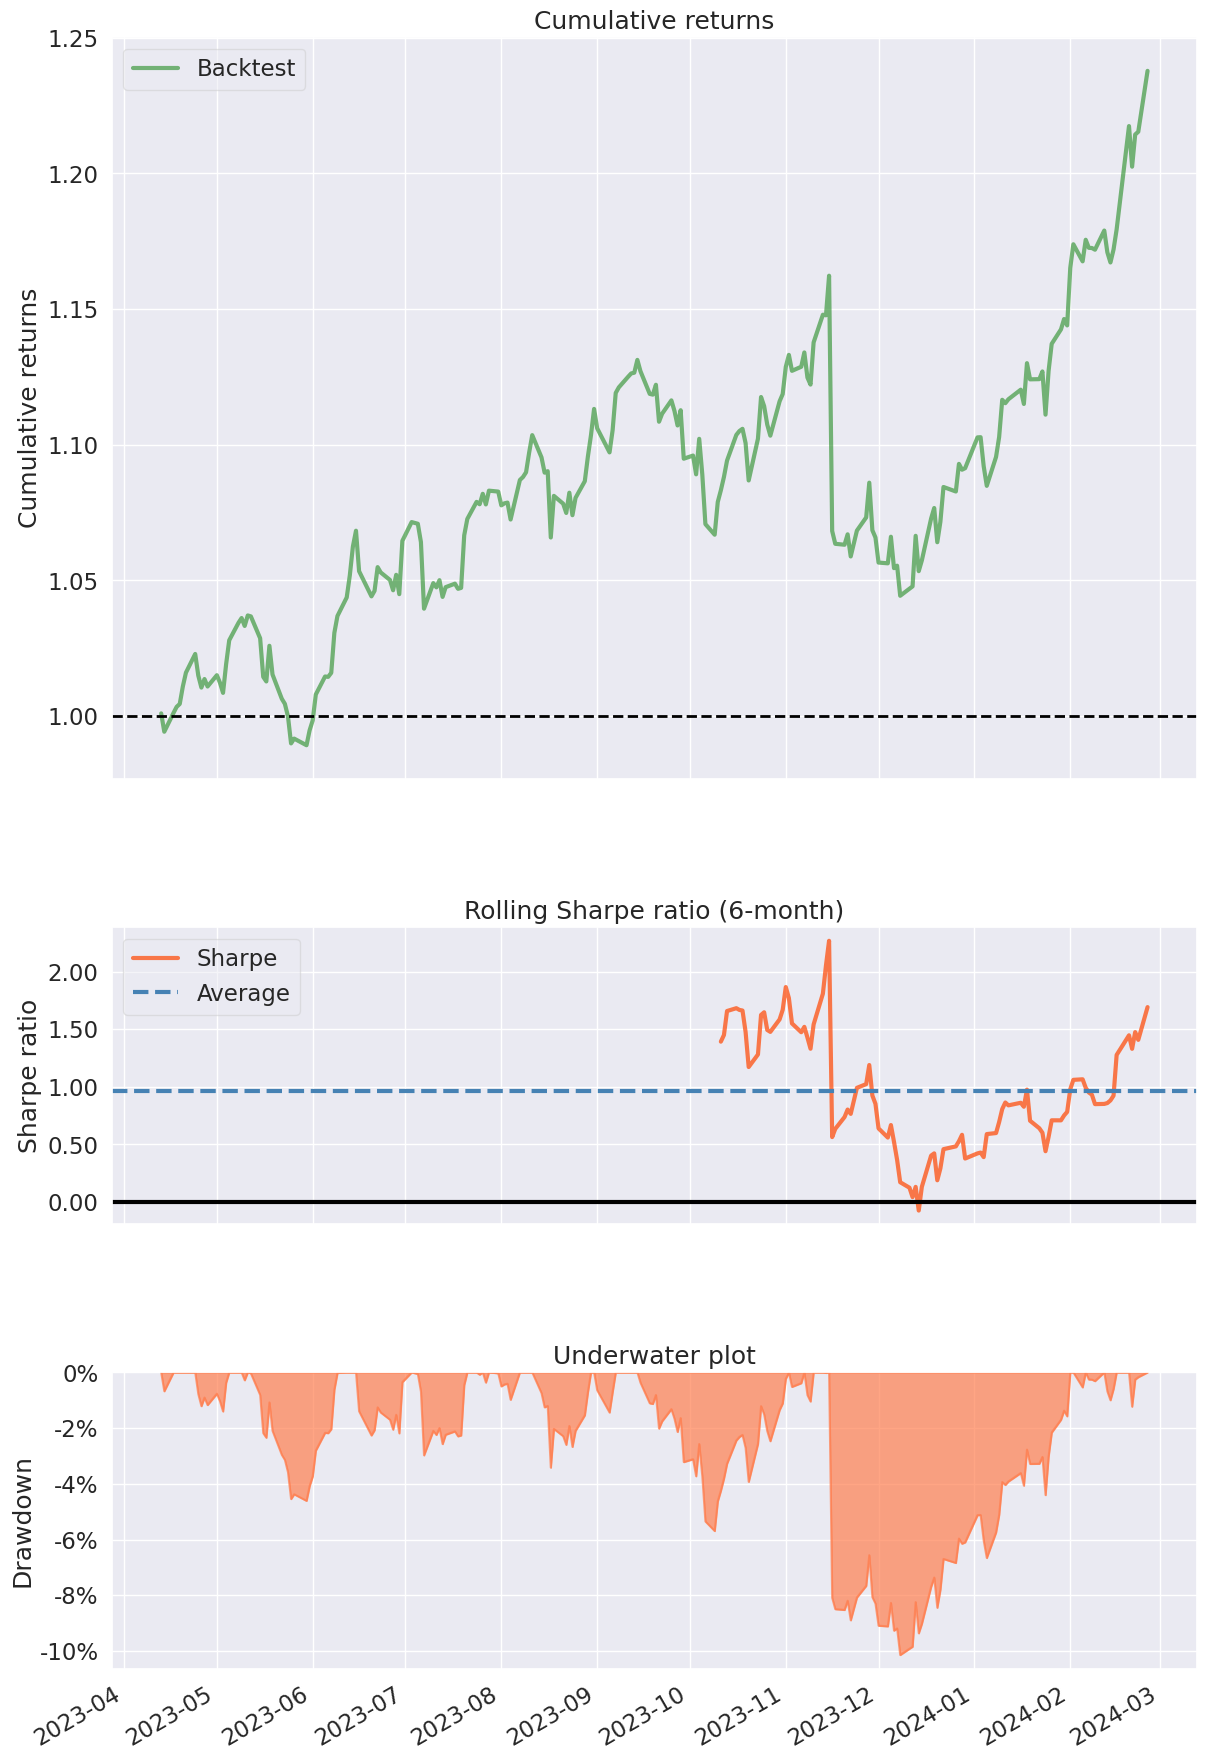

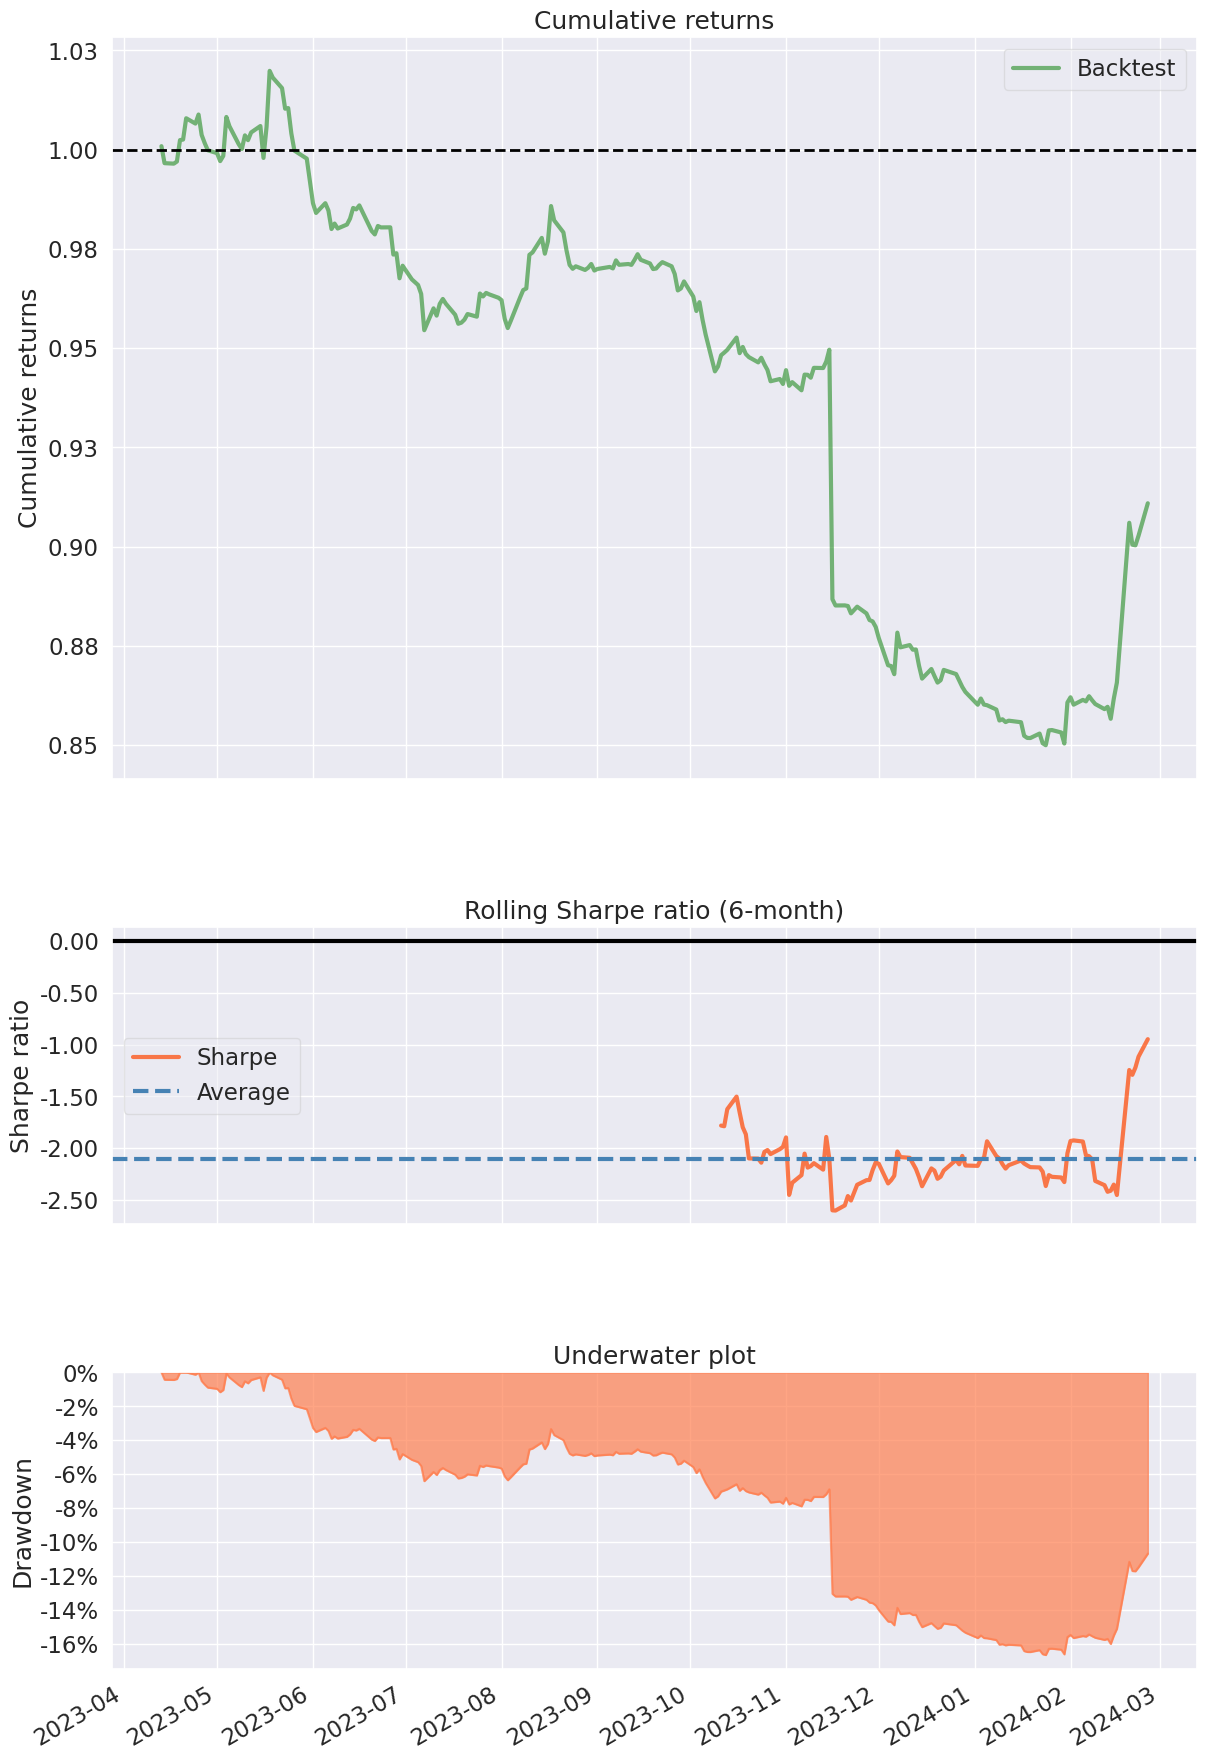

In [25]:
if __name__ == "__main__":

  import time
  start_time = time.time()
  main()
  print("--- %s seconds ---" % (time.time() - start_time))